In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn as sns
from sklearn.preprocessing import StandardScaler
df = pd.read_csv("D1.csv")

#Removing table display width limits
pd.set_option('display.max_columns', None)

C:\Users\MMejd\AppData\Local\Temp\ipykernel_9076\1238828060.py:7: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("D1.csv")


# Task 1 - Examinating and correcting data types.


## Displaying datatypes  
We initially inspect the data types

In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51766 entries, 0 to 51765
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              51766 non-null  int64 
 1   patient_nbr               51766 non-null  int64 
 2   race                      51766 non-null  object
 3   gender                    51766 non-null  object
 4   age                       51766 non-null  object
 5   weight                    51766 non-null  object
 6   admission_type_id         51766 non-null  int64 
 7   discharge_disposition_id  51766 non-null  int64 
 8   admission_source_id       51766 non-null  int64 
 9   length_of_stay            51766 non-null  int64 
 10  payer_code                51766 non-null  object
 11  medical_specialty         51766 non-null  object
 12  num_lab_procedures        51766 non-null  int64 
 13  num_procedures            51766 non-null  object
 14  num_medications       

## Unique values  
To gain a deeper understanding of the data, we may examine the unique data.   
By doing this, we may determine any inconsistency between the specified data type and the actual data type.

In [3]:
for column in df.columns:
    print(f"Unique values for {column}:\n{df[column].value_counts(dropna=False)}\n")


Unique values for encounter_id:
150645834    1
266467854    1
266427624    1
266436996    1
266440200    1
            ..
188690520    1
188691084    1
188691912    1
188693208    1
443867222    1
Name: encounter_id, Length: 51766, dtype: int64

Unique values for patient_nbr:
88785891     34
43140906     23
84428613     22
88227540     21
29903877     20
             ..
42813855      1
104583483     1
54949869      1
44187372      1
175429310     1
Name: patient_nbr, Length: 36183, dtype: int64

Unique values for race:
Caucasian          40388
AfricanAmerican     8070
Hispanic            1018
?                   1016
Other                896
Asian                378
Name: race, dtype: int64

Unique values for gender:
Female             27718
Male               24044
Unknown/Invalid        4
Name: gender, dtype: int64

Unique values for age:
[70-80)     12972
[60-70)     11620
[80-90)      9671
[50-60)      8485
[40-50)      4624
[30-40)      1717
[90-100)     1616
[20-30)       815
[10

## Conversion of data
Based on the unique values and the data types specified in the specification, we may convert the data. 

### encounter_id   

initial type: Int64   
It's nominal, so we will convert to category.    
We keep the internal data as integers, so we don't have to factorize it later.    
We do acknowledge that the column will be deleted later as it doesn't contribute to any understanding of the data. 

In [4]:
#Converting to category 
df['encounter_id'] = df['encounter_id'].astype('category')

### patient_nbr    

initial type: Int64   
It's nominal, so we will convert to category.  
We keep the internal data as integers, so we don't have to factorize it later. 

In [5]:
#Converting to category 
df['patient_nbr'] = df['patient_nbr'].astype('category')

### race  
We want to change it to categorical, as it's nominal string data.   
Categorial supports strings, thus we keep the "?" as a category.

In [6]:
#Converting to category 
df['race'] = df['race'].astype('category')

### gender

We want to change it to categorical, as it's nominal string data.  
Categorial supports strings, thus we keep the "unknown/undefined" as a category.

In [7]:
df['gender'] = df['gender'].astype('category')

### age

We want to change it to categorical, as it's ordinal string data.    

In [8]:
df['age'] = df['age'].astype('category')

### weight 

We want to change it to categorical, as it's ordinal string data.   
Categorial supports strings, thus we keep the "?" as a category.

In [9]:
df['weight'] = df['weight'].astype('category')

### admission_type_id   
It's nominal integer representing categories

In [10]:
df['admission_type_id'] = df['admission_type_id'].astype('category')

### discharge_disposition_id
It's nominal integer representing categories

In [11]:
df['discharge_disposition_id'] = df['discharge_disposition_id'].astype('category')

### admission_source_id

It's nominal integers representing categories, so we will convert it to categories. 

In [12]:
df['admission_source_id'] = df['admission_source_id'].astype('category')

### length_of_stay

Discrete value of integers with correct integer data type.  
No change.

### payer_code   
A nominal value. Converts to category.    
Categorial supports strings, thus we keep the "?" as a category.

In [13]:
df['payer_code'] = df['payer_code'].astype('category')

### medical_specialty

Nominal values. Converts to categories.

In [14]:
df['medical_specialty'] = df['medical_specialty'].astype('category')

### num_lab_procedures

Discrete values stored as integers.  
No change.

### num_procedures

Discrete values stored as strings with missing values noted '?'.  
We replace the questionmark with NaN and converts the data to integers. 

In [15]:
#Converting to integers. 
df['num_procedures'] = df['num_procedures'].replace('?',np.nan)
df['num_procedures'] = pd.to_numeric(df['num_procedures'])

# Convert the numeric column to integers
df['num_procedures'] = df['num_procedures'].astype('Int64')

### num_medications

Discrete value, but stored as a mixed datatype containing strings and integers.   
We will convert the string of '?' to integers and convert the data type to integers.

In [16]:
# Converting "?" to NaN
df['num_medications'] = df['num_medications'].replace('?',np.nan)
# Convert data to integer.
df['num_medications'] = pd.to_numeric(df['num_medications'])
# Convert data type to integer.
df['num_medications'] = df['num_medications'].astype('Int64')

### number_outpatient   

Discrete value stored as integer. No change. 

### number_emergency
Discrete value stored as integer. No change.

### number_inpatient
Discrete values stored as strings. We want to convert it to integers.   
contains "?". These will be converted to NaN. 

In [17]:
#Converting "?" to NaN. 
df['number_inpatient'] = df['number_inpatient'].replace('?',np.nan)
#Converting data to integers
df['number_inpatient'] = pd.to_numeric(df['number_inpatient'])
#Convert the data type to integer
df['number_inpatient'] = df['number_inpatient'].astype('Int64')

### diag_1
Nominal data. Converts to category.    
Categorial supports strings, thus we keep the "?" as a category.

In [18]:
df['diag_1'] = df['diag_1'].astype('category')

### diag_2
Nominal data. Converts to category.    
Categorial supports strings, thus we keep the "?" as a category.

In [19]:
df['diag_2'] = df['diag_2'].astype('category')

### diag_3
Nominal data. Converts to category.    
Categorial supports strings, thus we keep the "?" as a category.

In [20]:
df['diag_3'] = df['diag_3'].astype('category')

### number_diagnoses
Discrete values stored as integers. No change.

### max_glu_serum

Categorial values stored as strings. Will convert to categories. 

In [21]:
df['max_glu_serum'] = df['max_glu_serum'].astype('category')

### A1Cresult
Categorial values stored as strings. Will convert to categories.

In [22]:
df['A1Cresult'] = df['A1Cresult'].astype('category')

### metformin
Categorial values stored as strings. Will convert to categories.

In [23]:
df['metformin'] = df['metformin'].astype('category')

### repaglinide
Categorial values stored as strings. Will convert to categories.

In [24]:
df['repaglinide'] = df['repaglinide'].astype('category')

### nateglinide
Categorial values stored as strings. Will convert to categories.

In [25]:
df['nateglinide'] = df['nateglinide'].astype('category')

### chlorpropamide
We want to change it to categorical, as it's nominal string data.   
Categorial supports strings, thus we keep the "?" as a category.

In [26]:
df['chlorpropamide'] = df['chlorpropamide'].astype('category')

### glimepiride
Categorial values stored as strings. Will convert to categories.

In [27]:
df['glimepiride'] = df['glimepiride'].astype('category')

### acetohexamide
Categorial values stored as strings. Will convert to categories.

In [28]:
df['acetohexamide'] = df['acetohexamide'].astype('category')

### glipizide
Categorial values stored as strings. Will convert to categories.

In [29]:
df['glipizide'] = df['glipizide'].astype('category')

### glyburide
Categorial values stored as strings. Will convert to categories.

In [30]:
df['glyburide'] = df['glyburide'].astype('category')

### tolbutamide
Categorial values stored as strings. Will convert to categories.

In [31]:
df['tolbutamide'] = df['tolbutamide'].astype('category')

### insulin
Categorial values stored as strings. Will convert to categories.

In [32]:
df['insulin'] = df['insulin'].astype('category')

### change
Boolean data stored as strings, thus we will convert it to boolean.

In [33]:
#Setting a map for translation of No and Ch(Change) to boolean.
change_map = {'No':False, 'Ch': True}
#Applying the map
df['change'] = df['change'].map(change_map)
#Converting to boolean data type.
df['change'] = df['change'].astype(bool)

### diabetesMed
Boolean data stord as strings, thus we will convert it to boolean.

In [34]:
#Setting a map for translation of No and Yes to boolean.
change_map = {'No':False, 'Yes': True}
#Applying the map
df['diabetesMed'] = df['diabetesMed'].map(change_map)
#Converting to boolean data type
df['diabetesMed'] = df['diabetesMed'].astype(bool)

### readmitted
Converting to category.  
Contains category "?"

In [35]:
df['readmitted'] = df['readmitted'].astype('category')

### diabetes
Object containing Boolean data as strings.
Converts to booleans.

In [36]:
#Corrosponding boolean values
change_map = {'No':False, 'Yes': True}
#Applying the map to convert data to boolean
df['diabetes'] = df['diabetes'].map(change_map)
#Convert data type to boolean
df['diabetes'] = df['diabetes'].astype(bool)

## Displaying new data types

In [37]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51766 entries, 0 to 51765
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   encounter_id              51766 non-null  category
 1   patient_nbr               51766 non-null  category
 2   race                      51766 non-null  category
 3   gender                    51766 non-null  category
 4   age                       51766 non-null  category
 5   weight                    51766 non-null  category
 6   admission_type_id         51766 non-null  category
 7   discharge_disposition_id  51766 non-null  category
 8   admission_source_id       51766 non-null  category
 9   length_of_stay            51766 non-null  int64   
 10  payer_code                51766 non-null  category
 11  medical_specialty         51766 non-null  category
 12  num_lab_procedures        51766 non-null  int64   
 13  num_procedures            51736 non-null  Int6

### Checking unique values
We may now check if the unique values has changed as intended

In [38]:
for column in df.columns:
    print(f"Unique values for {column}:\n{df[column].value_counts()}\n")

Unique values for encounter_id:
150645834    1
266467854    1
266427624    1
266436996    1
266440200    1
            ..
188690520    1
188691084    1
188691912    1
188693208    1
443867222    1
Name: encounter_id, Length: 51766, dtype: int64

Unique values for patient_nbr:
88785891     34
43140906     23
84428613     22
88227540     21
29903877     20
             ..
56638359      1
56633562      1
56621223      1
56611269      1
189502619     1
Name: patient_nbr, Length: 36183, dtype: int64

Unique values for race:
Caucasian          40388
AfricanAmerican     8070
Hispanic            1018
?                   1016
Other                896
Asian                378
Name: race, dtype: int64

Unique values for gender:
Female             27718
Male               24044
Unknown/Invalid        4
Name: gender, dtype: int64

Unique values for age:
[70-80)     12972
[60-70)     11620
[80-90)      9671
[50-60)      8485
[40-50)      4624
[30-40)      1717
[90-100)     1616
[20-30)       815
[10



<br/><br/>
<br/><br/>
      
      
      
      
      
      

# Task 2 - Statistical measures and functions    

# Task 2.1 - Identify and report skewness

We create the following code to check the skewness factor (Pearson's second skewness factor).  
We set the tolerance to 0.1. This is a fine tolerance, and a skewness factor of 0.1 would only be slightly skewed.  
We also plot the data, to get a visual perspective of the skewness. 

In [39]:
import warnings
from IPython.display import Markdown, display
warnings.filterwarnings("ignore")

def print_skewness(column):
    skewness_tolerance=0.1
    median=df[column].median()
    mean=df[column].mean()
    stdDeviation=df[column].std()
    skewness=3*((mean-median)/stdDeviation)
    display(Markdown(f"### Column: {column}"))
    if skewness<-skewness_tolerance:
        display(Markdown("### Negatively skewed"))
    elif skewness>skewness_tolerance:
        display(Markdown("### Positively skewed"))
    else:
        display(Markdown("### Neutral"))
    
    print(f"Median: {round(median,2)}  ||  Mean: {round(mean,2)}  ||  Std. deviation: {round(stdDeviation,2)} \nSkewness: {round(skewness,2)}")

### length_of_stay



In [40]:
print_skewness("length_of_stay")

### Column: length_of_stay

### Positively skewed

Median: 3.0  ||  Mean: 4.24  ||  Std. deviation: 2.87 
Skewness: 1.29


### num_lab_procedures


In [41]:
print_skewness("num_lab_procedures")

### Column: num_lab_procedures

### Negatively skewed

Median: 45.0  ||  Mean: 43.85  ||  Std. deviation: 19.95 
Skewness: -0.17


### num_procedures


In [42]:
print_skewness("num_procedures")

### Column: num_procedures

### Positively skewed

Median: 1.0  ||  Mean: 1.31  ||  Std. deviation: 1.72 
Skewness: 0.54


### num_medications


In [43]:
print_skewness("num_medications")

### Column: num_medications

### Positively skewed

Median: 16.0  ||  Mean: 16.74  ||  Std. deviation: 8.07 
Skewness: 0.27


### number_outpatient   


In [44]:
print_skewness("number_outpatient")

### Column: number_outpatient

### Positively skewed

Median: 0.0  ||  Mean: 0.51  ||  Std. deviation: 1.54 
Skewness: 1.0


### number_emergency

In [45]:
print_skewness("number_emergency")

### Column: number_emergency

### Positively skewed

Median: 0.0  ||  Mean: 0.27  ||  Std. deviation: 1.15 
Skewness: 0.7


### number_inpatient


In [46]:
print_skewness("number_inpatient")

### Column: number_inpatient

### Positively skewed

Median: 0.0  ||  Mean: 0.69  ||  Std. deviation: 1.32 
Skewness: 1.56


### number_diagnoses


In [47]:
print_skewness("number_diagnoses")

### Column: number_diagnoses

### Negatively skewed

Median: 9.0  ||  Mean: 7.93  ||  Std. deviation: 1.69 
Skewness: -1.9


## 2.2 Inspecting errors and missing values


### encounter_id   
We check if there are any dublicated values, as these should be unique.   
Found none. 

In [48]:
print(f"Number of dublicates: {len(df['encounter_id'][df['encounter_id'].duplicated()])}")

Number of dublicates: 0


### 2.2.1 Inconsistencies in multiple entity relations
Some entities should remain constant in relation to a patient number. However, upon inspection of the data we've found some inconsistencies where patient number have multiple genders.   

We use the following function to inspect all columns that should be consistent (race, gender), which we can correct in task 4 by setting all values to the mode of the entity for the patient. 

We use the following function. 

In [49]:
#Grouping by patient number and creating a boolean DataFrame for all attributes, representing if it has various entries. 
rows_with_multiple=df.groupby('patient_nbr').transform('nunique')>1

#Function to print all rows for a specific column with diverse entries in that column.
def checkPatientNbrForDiverseEntries(Column):
    #Gets all rows with multiple entries in the column
    rows=df[rows_with_multiple[Column]][['patient_nbr',Column]]
    #Sorts by patient number for easier inspection. 
    sorted_rows=rows.sort_values(by='patient_nbr')
    print(sorted_rows)

#### race
Race doesn't change, so any inconsistency is an error. 
Any ? or Other would be substituted by the mode in task 4.

In [50]:
checkPatientNbrForDiverseEntries('race')

      patient_nbr       race
29469     1400022   Hispanic
33253     1400022          ?
34810     2187144  Caucasian
20991     2187144          ?
42094    12186837      Other
...           ...        ...
40881   151228229      Other
49426   151228229      Asian
42212   151228229      Asian
46304   151756061  Caucasian
51671   151756061          ?

[340 rows x 2 columns]


####  Gender   
In present times people change genders. However, based on our data we assume it must be data entry mistakes.


In [51]:
checkPatientNbrForDiverseEntries('gender')

      patient_nbr           gender
11356    31693671           Female
24156    31693671           Female
32094    31693671           Female
51764    31693671  Unknown/Invalid
24244    40867677             Male
26845    40867677           Female
39981    40867677             Male
15862   109210482           Female
16706   109210482             Male


### 2.2.2 Individual entities's errors or missing values. 
Using the following code, we print unique values for each column, to determine errors or missing values

### Checking for unintentional spaces.   
We check if any string values contain spaces, as an unintentional space can differentiate two otherwise equeal values, e.g. "250" and " 250 "   
We found none, so this is not an issue. 

In [52]:
#list to hold values containing space
space_values=[]

#Checking each value in each column
for column in df.columns:
    for index,value in df[column].items():
        #If the value is string, check if it has a space. 
        if type(value)==str and ' ' in value:
            #Insert into space_values.
            space_values.append((value,column,index))

print(f"Number of values with space:{len(space_values)}")

Number of values with space:0


### encounter_id   
No data issues. They are all integers not containing NaN.

In [53]:
#Check if it contains NaN
is_nan_mask = df['encounter_id'].isna()
print(is_nan_mask.any())

False


### patient_nbr    
No data issues. They are all integers not containing NaN.

In [54]:
#Check if it contains NaN
is_nan_mask = df['patient_nbr'].isna()
print(is_nan_mask.any())

False


### race  
Contains "?".

In [55]:
#check for "?"
df['race'].value_counts()

Caucasian          40388
AfricanAmerican     8070
Hispanic            1018
?                   1016
Other                896
Asian                378
Name: race, dtype: int64

### gender

gender contains missing values as seen below. There are 4 instances of "unknown/Invalid". 
The "unknown/Invalid" is changes to "?" to remain consistent and prevent future errors. 

In [56]:
#Showing data prior to conversion:
print(f"Before conversion: \n{df['gender'].value_counts()}")

#Converting "Unknown/Invalid" to "?"
df['gender'] = df['gender'].replace('Unknown/Invalid','?')

#Showing the result:
print(f"\nAfter conversion: \n{df['gender'].value_counts()}")

Before conversion: 
Female             27718
Male               24044
Unknown/Invalid        4
Name: gender, dtype: int64

After conversion: 
Female    27718
Male      24044
?             4
Name: gender, dtype: int64


### age
No missing values

In [57]:
#Before cleaning:
print(f"Data: \n{df['age'].value_counts()} \n")


Data: 
[70-80)     12972
[60-70)     11620
[80-90)      9671
[50-60)      8485
[40-50)      4624
[30-40)      1717
[90-100)     1616
[20-30)       815
[10-20)       223
[0-10)         23
Name: age, dtype: int64 



### weight 

The columns contains 50431 missing values notet "?". This is a major part of the data.  

In [58]:
#Before cleaning
print(f"Data: \n{df['weight'].value_counts()} \n")


Data: 
?            50431
[75-100)       542
[50-75)        347
[100-125)      309
[125-150)       72
[25-50)         29
[150-175)       18
[0-25)          11
[175-200)        5
>200             2
Name: weight, dtype: int64 



### admission_type_id   
Multiple ID's representing missing values

In [59]:
print(f"Data: \n{df['admission_type_id'].value_counts(dropna=False)}")

Data: 
1    29737
3    10481
2     8776
5     1478
6     1107
8      165
7       19
4        3
Name: admission_type_id, dtype: int64


### discharge_disposition_id
Multiple ID's representing missing values

In [60]:
print(f"Data: \n{df['discharge_disposition_id'].value_counts(dropna=False)}")

Data: 
1     30868
3      8105
6      7594
22     1290
2      1149
11      796
7       355
4       329
13      300
14      235
5       232
23      231
28      120
24       44
15       42
18       23
9        18
25       14
8        10
19        7
27        4
Name: discharge_disposition_id, dtype: int64


### admission_source_id
Multiple ID's representing missing values

In [61]:
print(f"Data: \n{df['admission_source_id'].value_counts(dropna=False)}")

Data: 
7     33472
1     15913
4       856
17      705
2       330
5       245
6       182
3        22
22       12
8         8
9         7
10        7
11        2
25        2
13        1
14        1
20        1
Name: admission_source_id, dtype: int64


### length_of_stay

No errors, no missing values.

In [62]:
print(f"Data: \n{df['length_of_stay'].value_counts(dropna=False)}")

Data: 
3     9422
2     9022
1     7523
4     7196
5     5109
6     3729
7     2921
8     2030
9     1398
10    1023
11     807
12     609
13     548
14     429
Name: length_of_stay, dtype: int64


### payer_code   
Contains 7601 missing values named "?". 

In [63]:
print(f"Data: \n{df['payer_code'].value_counts(dropna=False)}")

Data: 
MC    23046
?      7601
HM     4702
SP     3808
BC     3165
MD     2537
CP     1801
CM     1696
UN     1192
OG      879
PO      511
DM      412
CH      127
WC      100
OT       83
MP       79
SI       26
FR        1
Name: payer_code, dtype: int64


### medical_specialty
Contains 32203 missing values named "?", which is a major part of the data. 

In [64]:
print(f"Data: \n{df['medical_specialty'].value_counts(dropna=False)}")

Data: 
?                                    32203
Emergency/Trauma                      5616
InternalMedicine                      3854
Family/GeneralPractice                1949
Cardiology                            1667
Surgery-General                       1326
Radiologist                           1070
Orthopedics                            681
Nephrology                             468
Surgery-Vascular                       332
Gastroenterology                       297
Orthopedics-Reconstructive             286
Psychiatry                             244
Pulmonology                            211
Urology                                203
ObstetricsandGynecology                185
Oncology                               143
Neurology                              110
Surgery-Cardiovascular/Thoracic        105
Surgery-Neuro                           76
Podiatry                                72
Psychology                              64
Pediatrics                              59
Hema

### num_lab_procedures
Contains no missing values or errors. 


In [65]:
pd.set_option('display.max_rows', None)
print(f"Data: \n{df['num_lab_procedures'].value_counts(dropna=False)}")

Data: 
1      1885
43     1326
44     1194
40     1180
45     1176
38     1103
37     1096
41     1087
46     1059
42     1053
39     1051
49     1050
54     1039
51     1018
48     1018
55     1014
52     1010
56     1002
47     1001
36      994
58      972
53      967
50      963
60      912
57      901
61      897
59      884
35      867
29      821
34      810
63      799
30      794
62      788
64      758
32      709
65      689
66      676
2       644
33      638
28      631
31      611
68      601
67      581
69      547
26      465
10      453
70      442
71      431
3       418
72      414
19      400
9       386
27      360
74      351
73      340
11      338
21      331
20      330
25      322
75      275
76      258
4       239
13      230
22      222
7       220
24      217
12      212
77      203
23      199
18      195
78      194
79      183
16      181
6       178
14      176
5       172
17      155
15      155
80      154
81      142
8       136
83      133
82      1

### num_procedures
Contains 30 missing values set with NaN-value, and no unrealistic numbers.

In [66]:
print(f"Data: \n{df['num_procedures'].value_counts(dropna=False)}")

Data: 
0       24578
1       10260
2        6377
3        4346
6        2873
4        2099
5        1203
<NA>       30
Name: num_procedures, dtype: Int64


### num_medications

Contains 62 missing values set with NaN-value, and no unrealistic numbers.

In [67]:
print(f"Data: \n{df['num_medications'].value_counts(dropna=False)}")

Data: 
15      3005
13      2984
14      2858
16      2843
12      2822
11      2749
17      2632
18      2478
10      2465
9       2212
19      2210
20      2078
8       1862
21      1843
22      1676
7       1460
23      1396
24      1256
6       1145
25      1107
26       953
5        857
27       843
28       760
29       597
4        556
30       514
31       423
32       381
3        370
33       296
34       264
35       226
2        197
37       170
36       165
38       123
39       110
1        102
40        90
41        78
<NA>      62
42        57
43        50
44        47
45        40
46        35
47        34
49        31
50        27
48        23
52        19
53        19
56        18
51        18
55        17
54        13
57        13
60        13
58        12
62        11
59         9
64         7
65         6
61         6
63         6
66         4
68         4
72         3
67         3
69         1
74         1
75         1
Name: num_medications, dtype: Int64


### number_outpatient   
Contains no missing values or errors. 

In [68]:
print(f"Data: \n{df['number_outpatient'].value_counts(dropna=False)}")

Data: 
0     40575
1      5422
2      2505
3      1405
4       765
5       357
6       236
7       124
8        70
9        67
10       45
11       33
13       27
12       25
14       24
15       18
16       12
17        7
20        6
21        6
18        5
22        5
19        3
24        3
27        3
23        2
26        2
33        2
25        2
35        1
38        1
37        1
28        1
34        1
36        1
39        1
42        1
29        1
40        1
Name: number_outpatient, dtype: int64


### number_emergency
No missing values or errors

In [69]:
print(f"Data: \n{df['number_emergency'].value_counts(dropna=False)}")

Data: 
0     44164
1      5044
2      1398
3       493
4       242
5       147
6        67
7        49
8        34
10       26
9        23
11       20
13       11
12       10
18        5
20        4
22        4
19        4
16        4
14        3
15        3
21        2
46        1
25        1
76        1
37        1
64        1
63        1
54        1
24        1
29        1
Name: number_emergency, dtype: int64


### number_inpatient
No missing values or errors

In [70]:
print(f"Data: \n{df['number_outpatient'].value_counts(dropna=False)}")

Data: 
0     40575
1      5422
2      2505
3      1405
4       765
5       357
6       236
7       124
8        70
9        67
10       45
11       33
13       27
12       25
14       24
15       18
16       12
17        7
20        6
21        6
18        5
22        5
19        3
24        3
27        3
23        2
26        2
33        2
25        2
35        1
38        1
37        1
28        1
34        1
36        1
39        1
42        1
29        1
40        1
Name: number_outpatient, dtype: int64


### diag_1
Contains 10 "?" missing values. 
Also contains 1, 2, 4 and 5 digit data, like 250.32, even though the requirement states it must be 3 digit. This is a data error as it does not follow the description of the specification. 

In [71]:
print(f"Data: \n{df['diag_1'].value_counts(dropna=False)}")

Data: 
428       3395
414       2746
486       1808
786       1747
410       1626
427       1502
491       1432
715       1219
682       1075
780       1059
38        1012
434       1004
584        965
599        963
250.8      949
996        946
276        941
518        752
493        603
250.6      579
820        577
562        535
577        519
435        499
574        499
560        481
296        473
V57        458
250.7      386
250.13     385
578        383
998        379
440        373
8          353
433        328
250.02     316
789        307
453        300
722        296
507        289
403        280
250.82     271
250.11     260
530        260
415        253
250.12     250
458        239
162        236
724        233
535        223
285        212
482        203
558        200
997        195
280        194
824        187
295        187
733        186
402        185
592        182
401        176
590        171
197        167
153        166
250.1      164
511        150
569

### diag_2
Contains 92 "?" missing values. 
Also contains 1, 2, 4 and 5 digit data, like 250.92, even though the requirement states it must be 3 digit. This is a data error as it does not follow the description of the specification. We assume that 250.92 and etc, is a subdiciease.  
Also contains V42 and others containing letters, which is not digits. However, V42 is a legit decease according to the internet. 

In [72]:
print(f"Data: \n{df['diag_2'].value_counts(dropna=False)}")

Data: 
276       3604
428       3177
250       2685
427       2536
599       1826
401       1705
496       1578
585       1569
414       1285
403       1267
584       1158
250.02    1061
707       1036
285        947
411        944
491        883
486        880
518        806
682        746
780        718
425        681
424        490
413        451
493        441
786        345
305        345
250.6      333
410        295
785        293
998        273
280        270
511        269
799        266
250.01     240
996        237
577        234
38         229
272        226
162        215
197        213
295        208
41         205
789        192
571        188
560        188
V45        185
648        185
438        184
788        183
453        176
578        175
402        172
574        171
440        170
V85        169
198        168
303        156
997        153
730        151
426        150
530        148
287        146
278        139
591        136
250.8      134
342        131
V58

### diag_3
Contains 340 "?"   
Also contains 1, 2, 4 and 5 digit data, like 250.6, even though the requirement states it must be 3 digit. This is a data error as it does not follow the description of the specification. 

In [73]:
print(f"Data: \n{df['diag_3'].value_counts(dropna=False)}")

Data: 
250       5323
401       3861
276       2968
428       2370
427       2016
414       1748
585       1679
403       1331
496       1312
599       1060
272       1017
250.02     775
707        683
285        683
780        659
V45        591
425        585
584        544
682        507
424        473
518        472
305        445
250.6      442
V58        376
41         345
491        344
?          340
278        338
493        327
786        321
530        319
486        307
799        260
995        245
244        236
785        223
511        218
287        208
280        208
197        201
250.8      199
402        198
787        195
411        186
357        179
438        175
458        170
413        168
294        168
412        167
788        166
295        166
789        157
560        157
250.01     151
571        151
426        147
535        146
198        146
593        140
784        138
997        137
250.4      137
V15        137
E849       136
996        135
300

### number_diagnoses
No issues

In [74]:
print(f"Data: \n{df['number_diagnoses'].value_counts(dropna=False)}")

Data: 
9     31735
8      4907
7      4653
6      4192
5      3126
4      1866
3       868
2       255
1        49
16       45
10       17
13       16
11       11
15       10
12        9
14        7
Name: number_diagnoses, dtype: int64


### max_glu_serum
Contains 51059 'None'. It's not missing values, but most of the tests were not taken. 

 \> 200 covers >300 too.

In [75]:
print(f"Data: \n{df['max_glu_serum'].value_counts(dropna=False)} \n")

Data: 
None    51059
>300      354
Norm      241
>200      112
Name: max_glu_serum, dtype: int64 



### A1Cresult  
 \> 7 covers >8 too.

In [76]:
print(f"Data: \n{df['A1Cresult'].value_counts(dropna=False)} \n")

Data: 
None    42357
>8       3858
Norm     3299
>7       2252
Name: A1Cresult, dtype: int64 



### metformin
Data is good, no errors. 

In [77]:
print(f"Data: \n{df['metformin'].value_counts(dropna=False)} \n")

Data: 
No        40854
Steady    10126
Up          495
Down        291
Name: metformin, dtype: int64 



### repaglinide
data is good, no errors. 

In [78]:
print(f"Data: \n{df['repaglinide'].value_counts(dropna=False)} \n")

Data: 
No        50821
Steady      862
Up           62
Down         21
Name: repaglinide, dtype: int64 



### nateglinide   
data is good, no errors.

In [79]:
print(f"Data: \n{df['nateglinide'].value_counts(dropna=False)} \n")

Data: 
No        51324
Steady      415
Up           19
Down          8
Name: nateglinide, dtype: int64 



### chlorpropamide
Data has 9 missing values "?", but no  data errors. 

In [80]:
print(f"Data: \n{df['chlorpropamide'].value_counts(dropna=False)} \n")

Data: 
No        51738
Steady       18
?             9
Up            1
Name: chlorpropamide, dtype: int64 



### glimepiride
No missing values or data errors. 

In [81]:
print(f"Data: \n{df['glimepiride'].value_counts(dropna=False)} \n")

Data: 
No        48827
Steady     2683
Up          152
Down        104
Name: glimepiride, dtype: int64 



### acetohexamide 
No missing values or data errors.   
However, the data is useless for any other conclusion that acetohexamide is not used for any of the instances, because it's constantly No.

In [82]:
print(f"Data: \n{df['acetohexamide'].value_counts(dropna=False)} \n")

Data: 
No    51766
Name: acetohexamide, dtype: int64 



### glipizide
No missing values or data errors. 

In [83]:
print(f"Data: \n{df['glipizide'].value_counts(dropna=False)} \n")

Data: 
No        45537
Steady     5673
Up          302
Down        254
Name: glipizide, dtype: int64 



### glyburide
No missing values or data errors. 

In [84]:
print(f"Data: \n{df['glyburide'].value_counts(dropna=False)} \n")

Data: 
No        47310
Steady     3957
Up          285
Down        214
Name: glyburide, dtype: int64 



### tolbutamide
No missing values or data errors.   
However, the data is useless for any other conclusion that tolbutamide is not used for any of the instances, because it's constantly No.

In [85]:
print(f"Data: \n{df['tolbutamide'].value_counts(dropna=False)} \n")

Data: 
No    51766
Name: tolbutamide, dtype: int64 



### insulin
No missing values or data errors.

In [86]:
print(f"Data: \n{df['insulin'].value_counts(dropna=False)} \n")

Data: 
No        21644
Steady    14863
Down       7636
Up         7623
Name: insulin, dtype: int64 



### change
No missing values or data errors.    

In [87]:
print(f"Data: \n{df['change'].value_counts(dropna=False)} \n")

Data: 
True     26663
False    25103
Name: change, dtype: int64 



### diabetesMed
No missing values or errors.

In [88]:
print(f"Data: \n{df['diabetesMed'].value_counts(dropna=False)} \n")

Data: 
True     40984
False    10782
Name: diabetesMed, dtype: int64 



### readmitted
No missing values or data errors. 

In [89]:
print(f"Data: \n{df['readmitted'].value_counts(dropna=False)} \n")

Data: 
NO     27938
>30    18214
<30     5614
Name: readmitted, dtype: int64 



### diabetes
No missing values or data errors. 

In [90]:
print(f"Data: \n{df['diabetes'].value_counts(dropna=False)} \n")

Data: 
True     40683
False    11083
Name: diabetes, dtype: int64 



## 2.3 Questions

### 2.3.a
What is the average length of stay in hospital of a female patient who
was readmitted in less than 30 days?

In [91]:
#We create a mask with true and false for each row, declaring if they meet the criteria.
df_23a_mask=((df['readmitted']=='<30')&(df['gender']=='Female'))

#We use that mask to filter data and then find the mean. 
average=df[df_23a_mask]['length_of_stay'].mean()

print(round(average,2))

4.52


### 2.3.b
Which age group has the highest risk of being readmitted within 30
days?

In [92]:
#We count how many records there are of each group:
category_count=df["age"].value_counts()

#We create a mask with true and false for each row, declaring if they meet the criteria.
df_23b_mask=((df['readmitted']=='<30'))

#We use that mask to filter data and get instances
category_filtered=df[df_23b_mask]['age']
category_filtered_count=category_filtered.value_counts()

#We calculate the risk as  (No. of instances in category) / (total no of records for category)
category_risk = category_filtered_count/category_count

max_risk=category_risk.max()
max_risk_category=category_risk.idxmax()

print( f"\nAge group with the highest risk: {max_risk_category}, with a risk of {round(max_risk*100,2)} %")
print(f"Category count:\n{category_count}\n")
print(f"Filtered counts:\n{category_filtered.value_counts()}\n")
print(f"Risk:\n{category_risk}\n")




Age group with the highest risk: [20-30), with a risk of 14.85 %
Category count:
[70-80)     12972
[60-70)     11620
[80-90)      9671
[50-60)      8485
[40-50)      4624
[30-40)      1717
[90-100)     1616
[20-30)       815
[10-20)       223
[0-10)         23
Name: age, dtype: int64

Filtered counts:
[70-80)     1435
[60-70)     1274
[80-90)     1130
[50-60)      788
[40-50)      471
[90-100)     193
[30-40)      187
[20-30)      121
[10-20)       15
[0-10)         0
Name: age, dtype: int64

Risk:
[0-10)      0.000000
[10-20)     0.067265
[20-30)     0.148466
[30-40)     0.108911
[40-50)     0.101860
[50-60)     0.092870
[60-70)     0.109639
[70-80)     0.110623
[80-90)     0.116844
[90-100)    0.119431
Name: age, dtype: float64



### 2.3.c
Which age groups have more than 4000 cases of being readmitted?

In [93]:
#We create a mask with true and false for each row, declaring if they meet the criteria.
df_23c_mask = ((df['readmitted']=='<30') | (df['readmitted']=='>30'))

#We use that mask to filter data
category_filtered=df[df_23c_mask]['age']

#We count the instances for each category
category_filtered_count=category_filtered.value_counts()

category_over_4000=category_filtered_count[category_filtered_count>4000]

print( f"\nAge groups with more than 4000 cases: \n{category_over_4000}")



Age groups with more than 4000 cases: 
[70-80)    6202
[60-70)    5349
[80-90)    4741
Name: age, dtype: int64


### 2.3.d
Which are the top-three race categories according to the number of
readmission cases?

In [94]:
#We create a mask used to find all readmitted rows. 
df_23d_mask=(df['readmitted']=='<30') | (df['readmitted']=='>30')

#finding all rows that were readmitted
readmissions=df[df_23d_mask]

#Count the number of readmissions for each race
race_readmission_count=readmissions['race'].value_counts()

#As they are ordered, we may take the 3 top results
top_3_race_categories=race_readmission_count.head(3)

print("Top 3 race categories in regards of readmission cases:")
print(top_3_race_categories)

print("\n All categories::")

print(race_readmission_count)

Top 3 race categories in regards of readmission cases:
Caucasian          19120
AfricanAmerican     3530
?                    367
Name: race, dtype: int64

 All categories::
Caucasian          19120
AfricanAmerican     3530
?                    367
Other                347
Hispanic             344
Asian                120
Name: race, dtype: int64


# Task 3 - Visualization plots
## Task 3.1 - Distribution and data quality  

<Axes: >

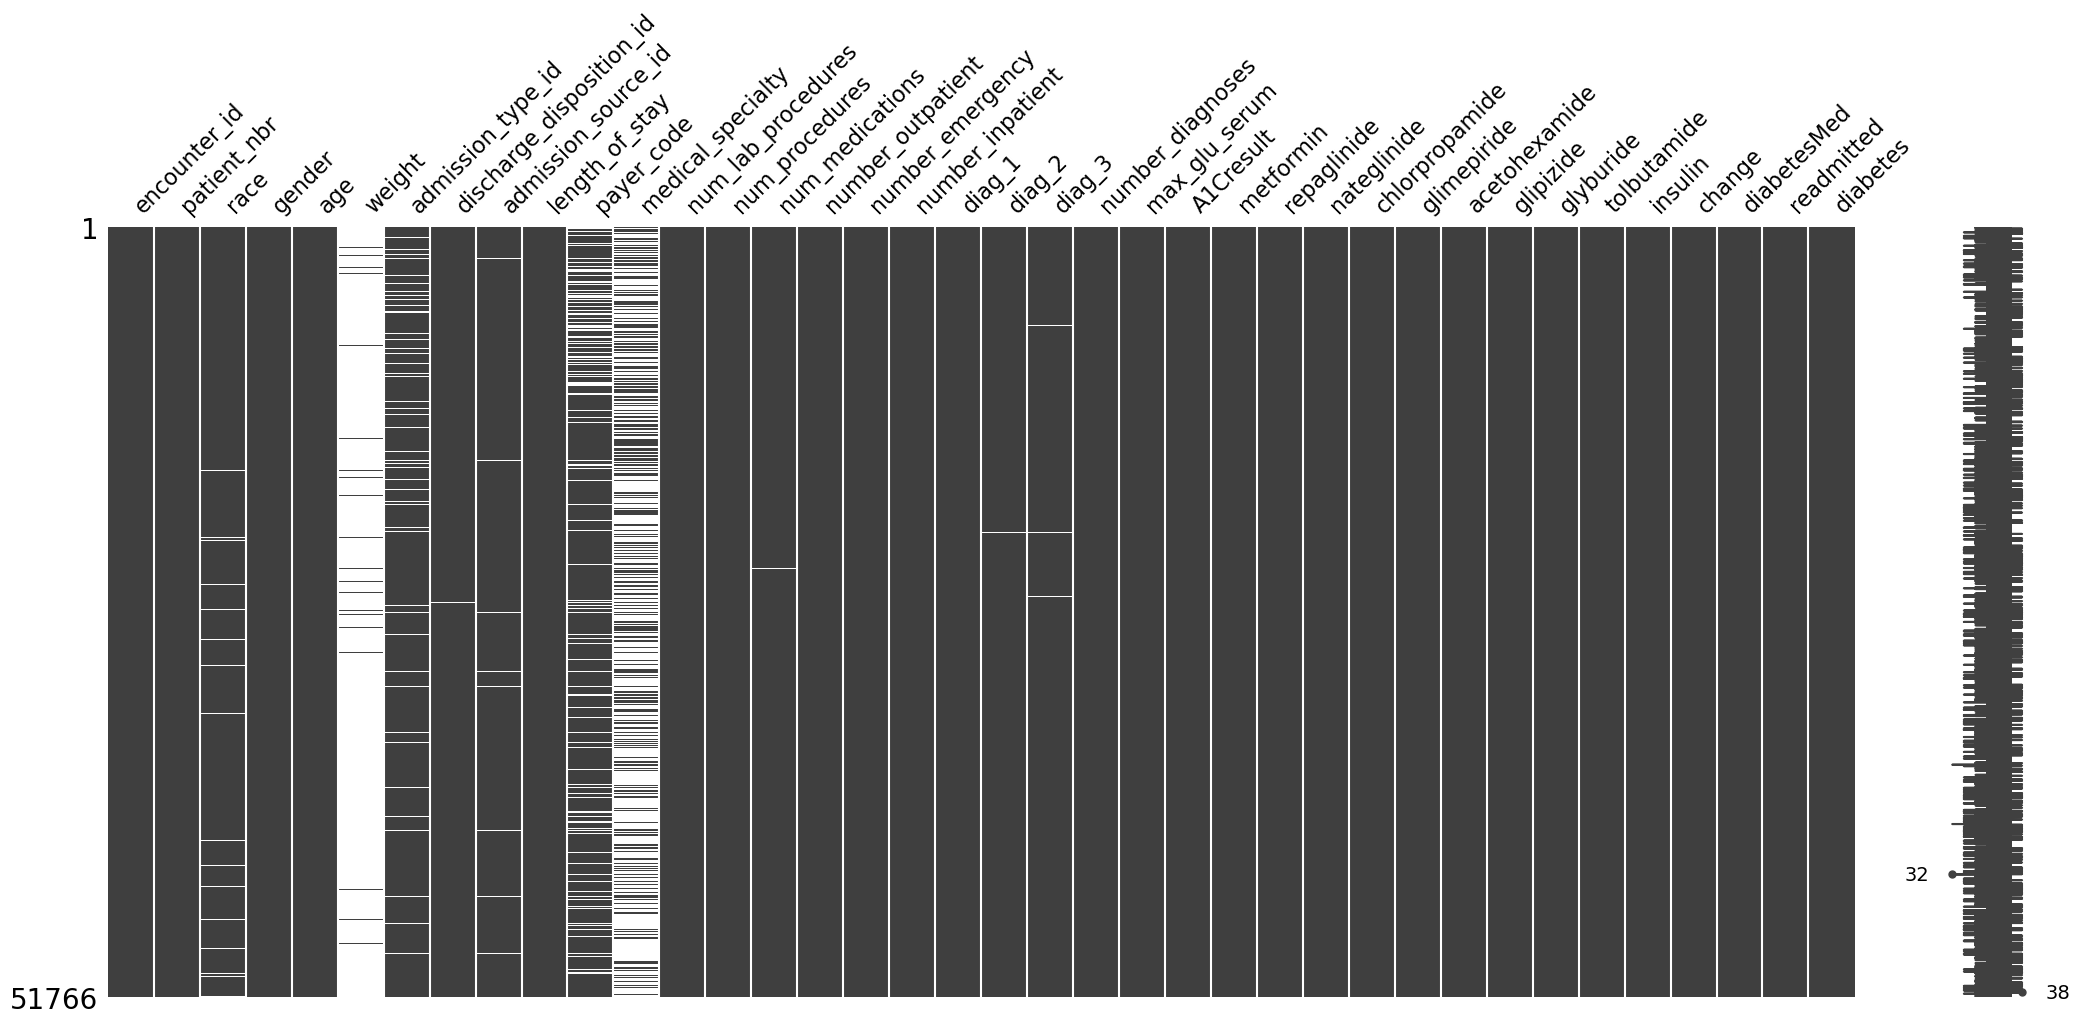

In [95]:
import missingno as msno
#Copy data and make all missing values into np.nan.
T31df = df.copy()
T31df=T31df.replace('?',np.nan)
T31df['admission_type_id']=T31df['admission_type_id'].replace([5,6,8],np.nan)
T31df['discharge_disposition_id']=T31df['discharge_disposition_id'].replace([18,25,26],np.nan)
T31df['admission_source_id']=T31df['admission_source_id'].replace([9,15,17,20,21],np.nan)
T31df['gender']=T31df['gender'].replace('unknown/invalid',np.nan)

msno.matrix(T31df)

#### Matrix subplot
We create a matrix subplot to hold all plots. Please notice that some y-axis are logarithmic scaled to achieve high details. 

Larger plots, methods and description for each column are described under this plot. 

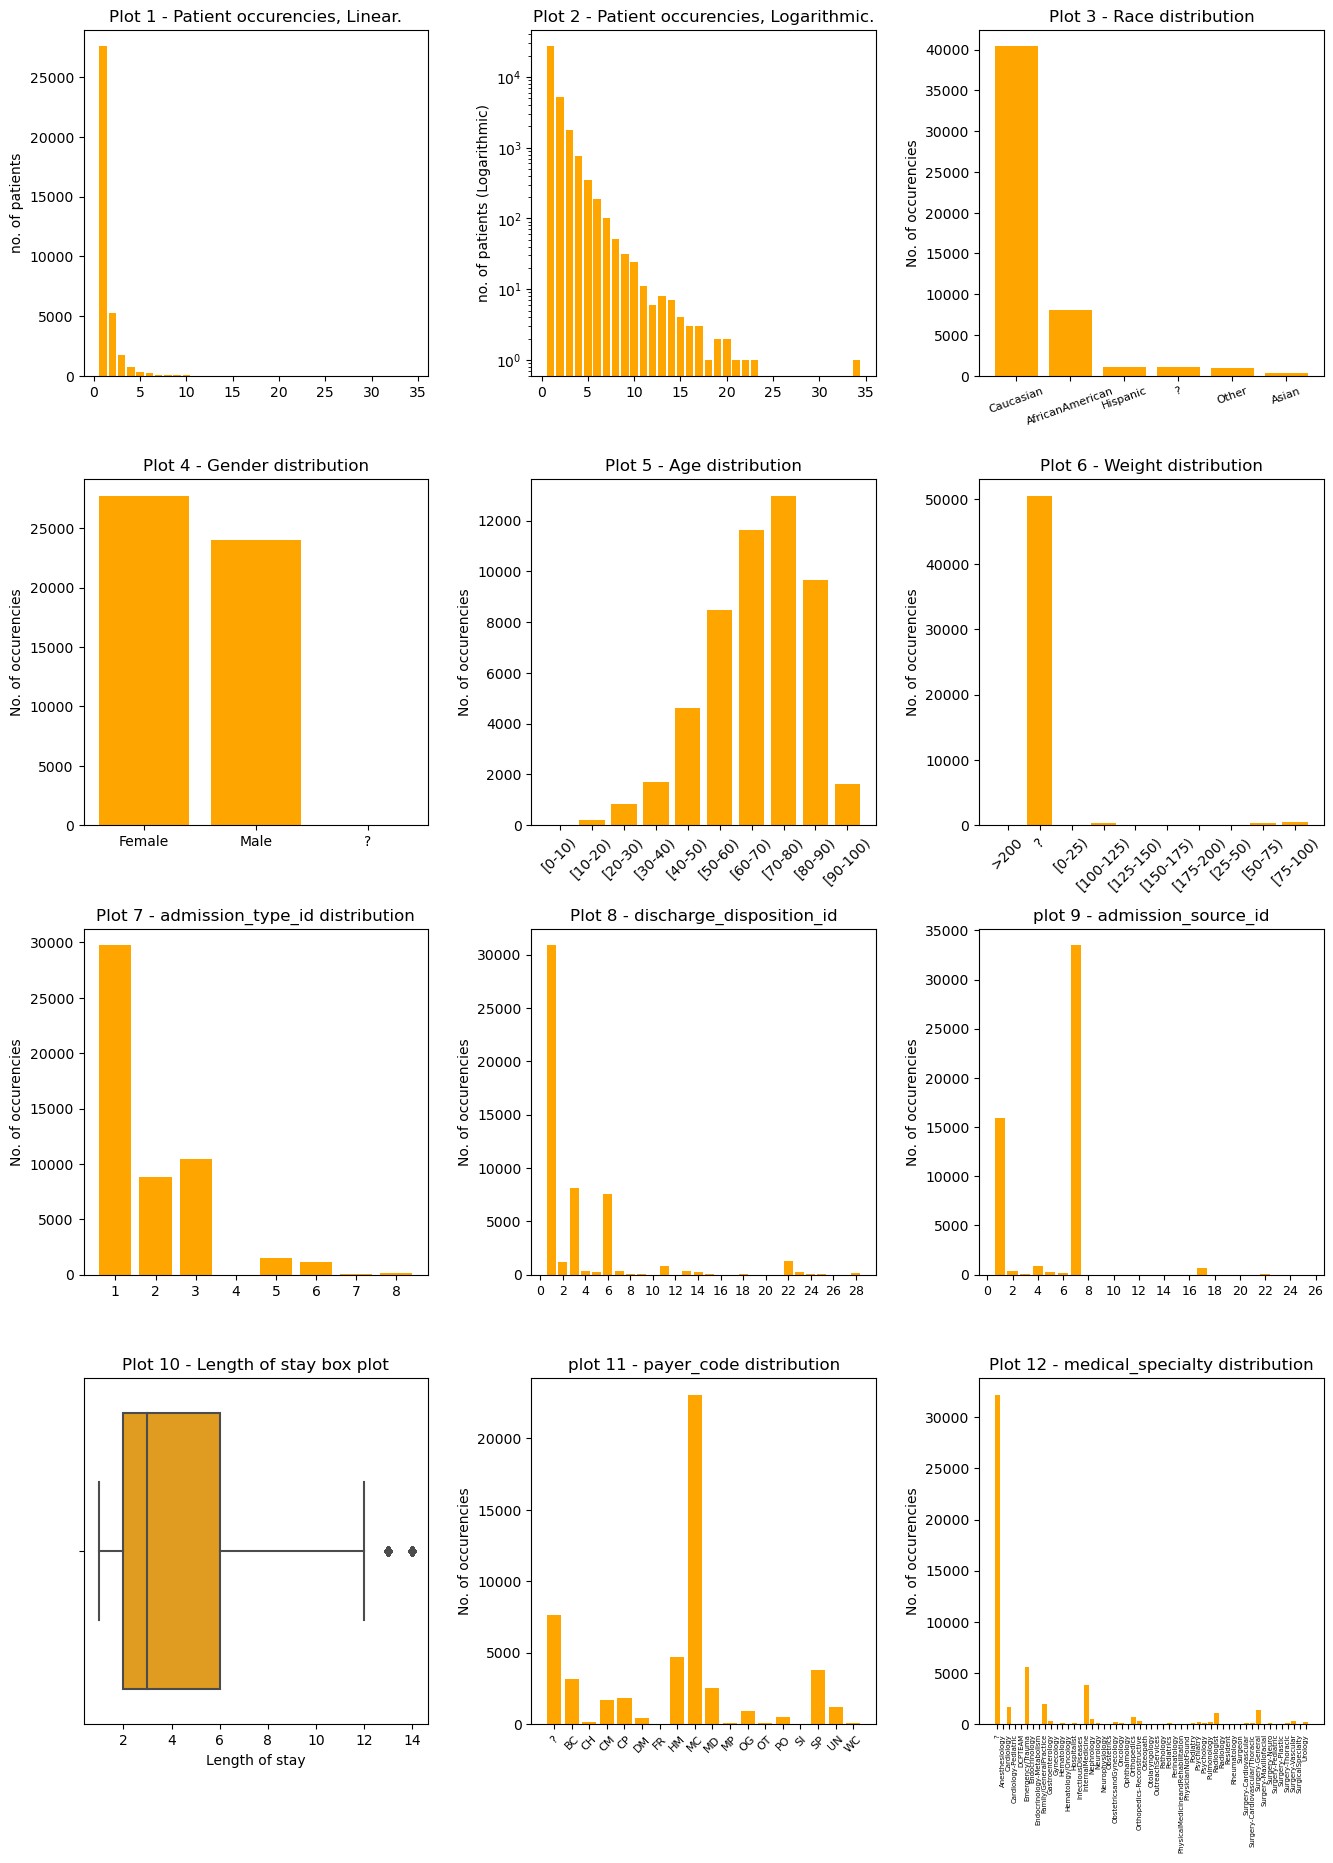

In [96]:
#Matrix subplot
_, axs=plt.subplots(4, 3, figsize=(16, 22))
plt.subplots_adjust(hspace=0.3,wspace=0.3)


# (------Patient _nbr ------)

#Count how many times a pateint number occurs. 
patient_count=df['patient_nbr'].value_counts()

#Count how many times each counted number occurs.
patient_count_count=patient_count.value_counts()

#Separating the index and values into two lists. 
count_labels=patient_count_count.index
count_values=patient_count_count.values

#Patient_nbr linear
axs[0, 0].bar(count_labels,count_values,color='orange')
axs[0, 0].set_title('Plot 1 - Patient occurencies, Linear.')
axs[0, 0].set_ylabel('no. of patients')

#Patient_nbr logarithmic
axs[0,1].bar(count_labels, count_values, color='orange')
axs[0,1].set_title('Plot 2 - Patient occurencies, Logarithmic.')
axs[0,1].set_ylabel('no. of patients (Logarithmic)')
axs[0,1].set_yscale('log')

# (------Race ------)

#Counting race occurencies. 
race_counts=df['race'].value_counts()

#Creating lists of values and indicies. 
race_index=race_counts.index
race_value=race_counts.values

#Making a bar plot
axs[0,2].bar(race_index,race_value,color='orange')
axs[0,2].set_title('Plot 3 - Race distribution')
axs[0,2].set_ylabel('No. of occurencies')
axs[0,2].tick_params(axis='x',labelsize=8,rotation=20)

# (------Gender ------)

#Counting gender occurencies. 
gender_counts=df['gender'].value_counts()

#Creating lists of values and indicies. 
gender_index=gender_counts.index
gender_value=gender_counts.values

#Making a bar plot
axs[1,0].bar(gender_index,gender_value,color='orange')
axs[1,0].set_title('Plot 4 - Gender distribution')
axs[1,0].set_ylabel('No. of occurencies')

# (------Age ------)

#Counting age occurencies and sorting by index.
age_counts=df['age'].value_counts().sort_index()

#Creating lists of values and indicies. 
age_index=age_counts.index
age_value=age_counts.values

#Making a bar plot
axs[1,1].bar(age_index,age_value,color='orange')
axs[1,1].set_title('Plot 5 - Age distribution')
axs[1,1].set_ylabel('No. of occurencies')
axs[1,1].tick_params(axis='x',rotation=45)

# (------Weight ------)

#Counting age occurencies and sorting by index.
weight_counts=df['weight'].value_counts().sort_index()

#As string sorting makes the plot a mess, we sort by the numerical value of the first number. 
weight_index=sorted(weight_counts.index,key=lambda x: int(x.split('-')[0]) if x[0].isdigit() else 99999)
weight_value=[weight_counts[x] for x in weight_index]

#Making a bar plot
axs[1,2].bar(weight_index,weight_value,color='orange')
axs[1,2].set_title('Plot 6 - Weight distribution')
axs[1,2].set_ylabel('No. of occurencies')
axs[1,2].tick_params(axis='x',rotation=45)

# (------ Admission_type_id ------)

#Counting admission occurencies and sorting by index.
admission_counts=df['admission_type_id'].value_counts().sort_index()

#Creating lists of values and indicies. 
admission_index=admission_counts.index
admission_value=admission_counts.values

#Making a bar plot
axs[2,0].bar(admission_index,admission_value,color='orange')
axs[2,0].set_title('Plot 7 - admission_type_id distribution')
axs[2,0].set_ylabel('No. of occurencies')
x_locator = MultipleLocator(base=1)
axs[2,0].xaxis.set_major_locator(x_locator)

# (------ discharce disposition  ------)

#Counting discharge disposition occurencies and sorting by index.
discharge_disposition_counts=df['discharge_disposition_id'].value_counts().sort_index()

#Creating lists of values and indicies. 
discharge_disposition_counts_index=discharge_disposition_counts.index
discharge_disposition_counts_value=discharge_disposition_counts.values

#Making a bar plot
axs[2,1].bar(discharge_disposition_counts_index,discharge_disposition_counts_value,color='orange')
axs[2,1].set_title('Plot 8 - discharge_disposition_id')
axs[2,1].set_ylabel('No. of occurencies')
x_locator = MultipleLocator(base=2)
axs[2, 1].xaxis.set_major_locator(x_locator)
axs[2,1].tick_params(axis='x',labelsize=9)

# (------ admission_source_id  ------)

#Counting discharge disposition occurencies and sorting by index.
category_counts=df['admission_source_id'].value_counts().sort_index()

#Creating lists of values and indicies. 
index=category_counts.index
values=category_counts.values

#Making a bar plot
axs[2, 2].bar(index,values,color='orange')
axs[2, 2].set_title('plot 9 - admission_source_id')
axs[2, 2].set_ylabel('No. of occurencies')
x_locator = MultipleLocator(base=2)
axs[2, 2].xaxis.set_major_locator(x_locator)
axs[2,2].tick_params(axis='x',labelsize=9)


# (------ Length_of_stay  ------)
sns.boxplot(data=df,x='length_of_stay',color='orange',ax=axs[3, 0])
axs[3, 0].set_title('Plot 10 - Length of stay box plot')
axs[3, 0].set_xlabel('Length of stay')


# (------ payer_code  ------)

#Counting discharge disposition occurencies and sorting by index.
category_counts=df['payer_code'].value_counts().sort_index()

#Creating lists of values and indicies. 
index=category_counts.index
values=category_counts.values

#Making a bar plot
axs[3, 1].bar(index,values,color='orange')
axs[3, 1].set_title('plot 11 - payer_code distribution')
axs[3, 1].set_ylabel('No. of occurencies')
axs[3, 1].tick_params(axis='x',rotation=45,labelsize=8)

# (------ medical_specialty  ------)

#Counting  occurencies and sorting by index.
category_counts=df['medical_specialty'].value_counts().sort_index()

#Creating lists of values and indicies. 
index=category_counts.index
values=category_counts.values

#Making a bar plot
axs[3, 2].bar(index,values,color='orange')
axs[3, 2].set_title('Plot 12 - medical_specialty distribution')
axs[3, 2].set_ylabel('No. of occurencies')
axs[3, 2].tick_params(axis='x',rotation=90,labelsize=5)

plt.show()

In [97]:
# (------ NEW SUBPLOT  ------)
#Matrix subplot
_, axs=plt.subplots(4, 3, figsize=(16, 22))
plt.subplots_adjust(hspace=0.3,wspace=0.3)

# (------ num_lab_procedures  ------)

sns.boxplot(data=df,x='num_lab_procedures',color='orange',ax=axs[0, 0])
axs[0, 0].set_title('Plot 13 - num_lab_procedures')
axs[0, 0].set_xlabel('Number of lab procedures')

# (------ num_procedures  ------)

sns.boxplot(data=df,x='num_procedures',color='orange',ax=axs[0, 1])
axs[0, 1].set_title('Plot 14 - num_procedures')
axs[0, 1].set_xlabel('Number of procedures')

# (------ num_medications  ------)

sns.boxplot(data=df,x='num_medications',color='orange',ax=axs[0, 2])
axs[0, 2].set_title('Plot 15 - num_medications')
axs[0, 2].set_xlabel('Number of medications')

# (------ number_outpatient  ------)

sns.boxplot(data=df,x='number_outpatient',color='orange',ax=axs[1, 0])
axs[1, 0].set_title('Plot 16 - number_outpatient')
axs[1, 0].set_xlabel('Number of outpatient visits')

# (------ number_emergency  ------)
sns.boxplot(data=df,x='number_emergency',color='orange',ax=axs[1, 1])
axs[1, 1].set_title('Plot 17 - number_emergency')
axs[1, 1].set_xlabel('Number of emergency visits')

# (------ number_inpatient  ------)
sns.boxplot(data=df,x='number_inpatient',color='orange',ax=axs[1, 2])
axs[1, 2].set_title('Plot 18 - number_inpatient')
axs[1, 2].set_xlabel('Number of inpatient visits')


# (------ diag  ------)
# Skipped because the size doesn't fit a subplot.
#Will be plotted in a separate section. 

# (------ number_diagnoses  ------)
sns.boxplot(data=df,x='number_diagnoses',color='orange',ax=axs[2, 0])
axs[2, 0].set_title('Plot 19 - number_diagnoses')
axs[2, 0].set_xlabel('Number of diagnoses')


# (------ max_glu_serum  ------)

#Counting occurencies and sorting by index.
column='max_glu_serum'
category_counts=df[column].value_counts().sort_index()

#Creating lists of values and indicies. 
index=category_counts.index
values=category_counts.values

#Making a bar plot
axs[2, 1].bar(index,values,color='orange')
axs[2, 1].set_title(f'Plot 20 - {column} distribution')
axs[2, 1].set_ylabel('No. of occurencies')


# (------ A1Cresult  ------)
column='A1Cresult'
category_counts=df[column].value_counts().sort_index()

#Creating lists of values and indicies. 
index=category_counts.index
values=category_counts.values
axs[2, 2].bar(index,values,color='orange')
axs[2, 2].set_title(f'Plot 21 - {column} distribution')
axs[2, 2].set_ylabel('No. of occurencies')

# (------ metformin  ------)
column='metformin'
category_counts=df[column].value_counts().sort_index()

#Creating lists of values and indicies. 
index=category_counts.index
values=category_counts.values
axs[3, 0].bar(index,values,color='orange')
axs[3, 0].set_title(f'Plot 22 - {column} distribution')
axs[3, 0].set_ylabel('No. of occurencies')


# (------ repaglinide  ------)
column='repaglinide'
category_counts=df[column].value_counts().sort_index()

#Creating lists of values and indicies. 
index=category_counts.index
values=category_counts.values
axs[3, 1].bar(index,values,color='orange')
axs[3, 1].set_title(f'Plot 23 - {column} distribution')
axs[3, 1].set_ylabel('No. of occurencies')


# (------ nateglinide  ------)
column='nateglinide'
category_counts=df[column].value_counts().sort_index()

#Creating lists of values and indicies. 
index=category_counts.index
values=category_counts.values
axs[3, 2].bar(index,values,color='orange')
axs[3, 2].set_title(f'Plot 24 - {column} distribution')
axs[3, 2].set_ylabel('No. of occurencies')


plt.show()

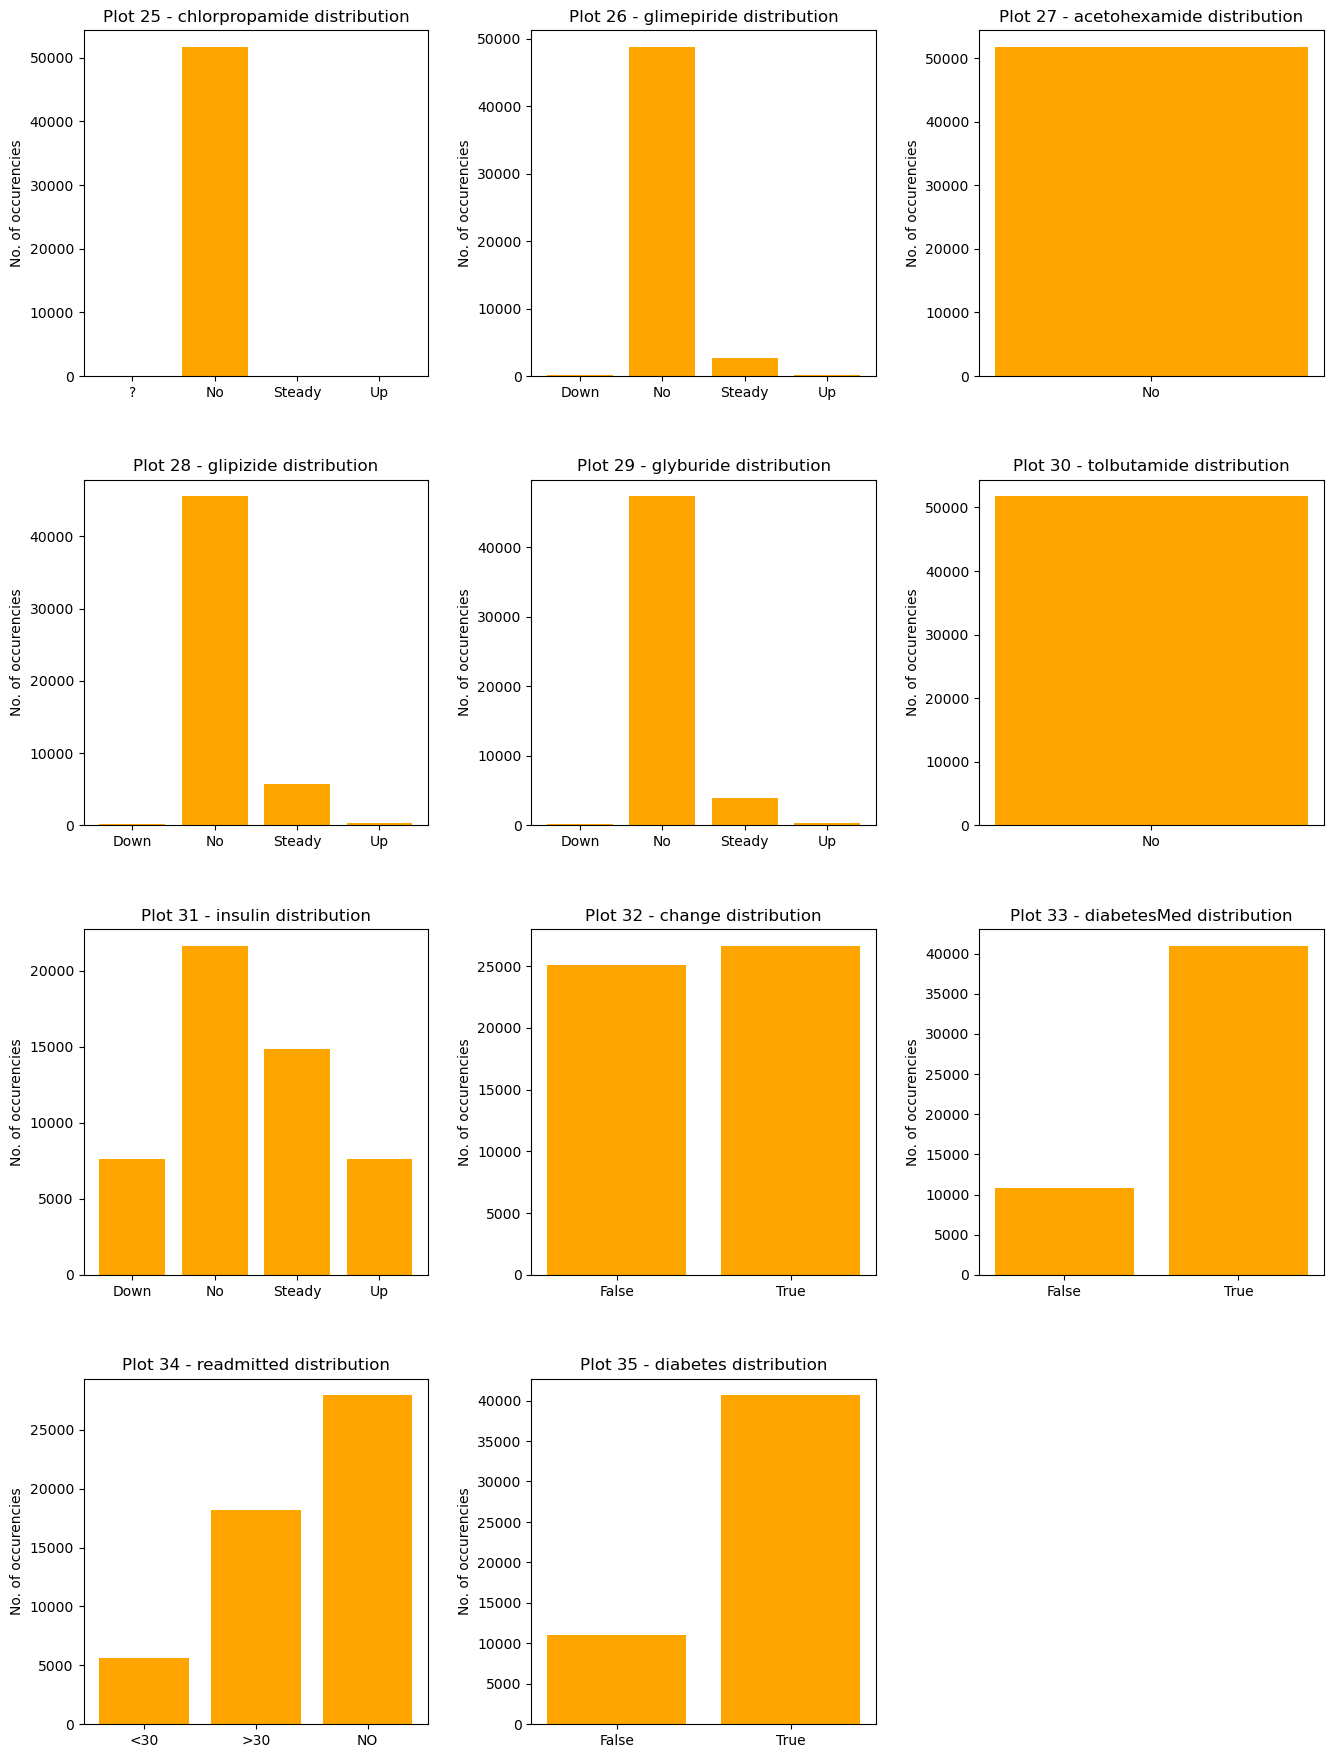

In [98]:
# (------ NEW SUBPLOT  ------)
#Matrix subplot
_, axs=plt.subplots(4, 3, figsize=(16, 22))
plt.subplots_adjust(hspace=0.3,wspace=0.3)

# (------ chlorpropamide  ------)
column='chlorpropamide'
category_counts=df[column].value_counts().sort_index()

#Creating lists of values and indicies. 
index=category_counts.index
values=category_counts.values
axs[0, 0].bar(index,values,color='orange')
axs[0, 0].set_title(f'Plot 25 - {column} distribution')
axs[0, 0].set_ylabel('No. of occurencies')


# (------ glimepiride  ------)
column='glimepiride'
category_counts=df[column].value_counts().sort_index()

#Creating lists of values and indicies. 
index=category_counts.index
values=category_counts.values
axs[0, 1].bar(index,values,color='orange')
axs[0, 1].set_title(f'Plot 26 - {column} distribution')
axs[0, 1].set_ylabel('No. of occurencies')



# (------ acetohexamide  ------)
column='acetohexamide'
category_counts=df[column].value_counts().sort_index()

#Creating lists of values and indicies. 
index=category_counts.index
values=category_counts.values
axs[0, 2].bar(index,values,color='orange')
axs[0, 2].set_title(f'Plot 27 - {column} distribution')
axs[0, 2].set_ylabel('No. of occurencies')

# (------ glipizide  ------)
column='glipizide'
category_counts=df[column].value_counts().sort_index()

#Creating lists of values and indicies. 
index=category_counts.index
values=category_counts.values
axs[1, 0].bar(index,values,color='orange')
axs[1, 0].set_title(f'Plot 28 - {column} distribution')
axs[1, 0].set_ylabel('No. of occurencies')

# (------ glyburide  ------)
column='glyburide'
category_counts=df[column].value_counts().sort_index()

#Creating lists of values and indicies. 
index=category_counts.index
values=category_counts.values
axs[1, 1].bar(index,values,color='orange')
axs[1, 1].set_title(f'Plot 29 - {column} distribution')
axs[1, 1].set_ylabel('No. of occurencies')


# (------ tolbutamide  ------)
column='tolbutamide'
category_counts=df[column].value_counts().sort_index()

#Creating lists of values and indicies. 
index=category_counts.index
values=category_counts.values
axs[1, 2].bar(index,values,color='orange')
axs[1, 2].set_title(f'Plot 30 - {column} distribution')
axs[1, 2].set_ylabel('No. of occurencies')


# (------ insulin  ------)
column='insulin'
category_counts=df[column].value_counts().sort_index()

#Creating lists of values and indicies. 
index=category_counts.index
values=category_counts.values
axs[2,0].bar(index,values,color='orange')
axs[2,0].set_title(f'Plot 31 - {column} distribution')
axs[2,0].set_ylabel('No. of occurencies')


# (------ change  ------)
column='change'
category_counts=df[column].value_counts().sort_index()

#Creating lists of values and indicies. 
index=category_counts.index
values=category_counts.values
axs[2,1].bar(index,values,color='orange')
axs[2,1].set_title(f'Plot 32 - {column} distribution')
axs[2,1].set_ylabel('No. of occurencies')
axs[2, 1].set_xticks(index)
axs[2, 1].set_xticklabels(['False', 'True'])

# (------ diabetesMed  ------)
column='diabetesMed'
category_counts=df[column].value_counts().sort_index()

#Creating lists of values and indicies. 
index=category_counts.index
values=category_counts.values
axs[2,2].bar(index,values,color='orange')
axs[2,2].set_title(f'Plot 33 - {column} distribution')
axs[2,2].set_ylabel('No. of occurencies')
axs[2, 2].set_xticks(index)
axs[2, 2].set_xticklabels(['False', 'True'])

# (------ readmitted  ------)
column='readmitted'
category_counts=df[column].value_counts().sort_index()

#Creating lists of values and indicies. 
index=category_counts.index
values=category_counts.values
axs[3,0].bar(index,values,color='orange')
axs[3,0].set_title(f'Plot 34 - {column} distribution')
axs[3,0].set_ylabel('No. of occurencies')


# (------ diabetes  ------)
column='diabetes'
category_counts=df[column].value_counts().sort_index()

#Creating lists of values and indicies. 
index=category_counts.index
values=category_counts.values

axs[3,1].bar(index,values,color='orange')
axs[3,1].set_title(f'Plot 35 - {column} distribution')
axs[3,1].set_ylabel('No. of occurencies')
axs[3, 1].set_xticks(index)
axs[3, 1].set_xticklabels(['False', 'True'])

axs[3,2].remove()





plt.show()

### patient_nbr    
We examine the distribution of how many times patient numbers are repeated, as some attributes of a patient may be the same for each row and therefore weight more in any further analysis.  
The results below show that the majority of our data has single occurencies of each patient, however there are a significant group of patients that occur twice and minor groups occuring above two times up until 34. 

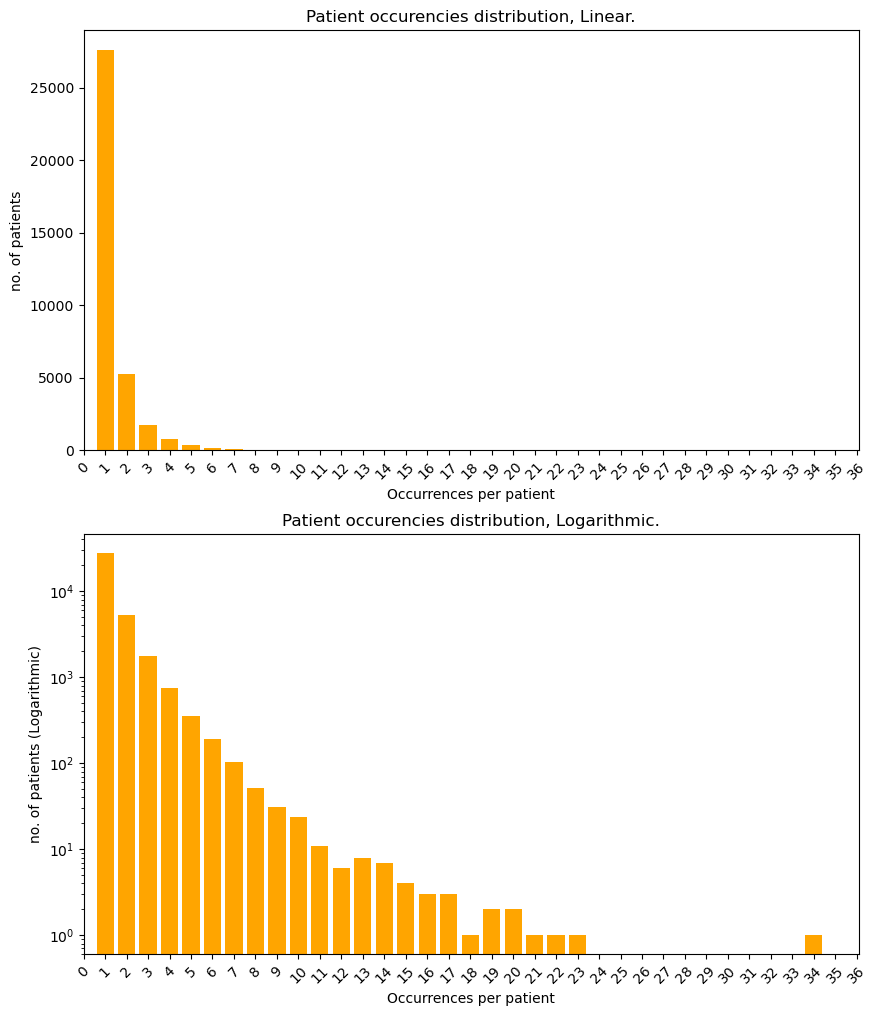

In [99]:
#Count how many times a pateint number occurs. 
patient_count=df['patient_nbr'].value_counts()

#Count how many times each counted number occurs.
patient_count_count=patient_count.value_counts()

#Separating the index and values into two lists. 
count_labels=patient_count_count.index
count_values=patient_count_count.values

#Creating a subplot because we want to show a linear and logarithmic plot. 
#The logarithmic plot allows us to inspect smaller values. 
_,axs=plt.subplots(2,1,figsize=(10,12))

#Linear plot
axs[0].bar(count_labels, count_values, color='orange')
axs[0].set_title('Patient occurencies distribution, Linear.')
axs[0].set_xlabel('Occurrences per patient')
axs[0].set_ylabel('no. of patients')
axs[0].tick_params(axis='x',rotation=45)

#logarithmic plot
axs[1].bar(count_labels, count_values, color='orange')
axs[1].set_title('Patient occurencies distribution, Logarithmic.')
axs[1].set_xlabel('Occurrences per patient')
axs[1].set_ylabel('no. of patients (Logarithmic)')
axs[1].set_yscale('log')
axs[1].tick_params(axis='x',rotation=45)

#Changing x-incremental labels to 1
x_locator = MultipleLocator(base=1)
axs[0].xaxis.set_major_locator(x_locator)
axs[1].xaxis.set_major_locator(x_locator)

axs[0].set_xlim(0)
axs[1].set_xlim(0)
plt.show()


### weight 



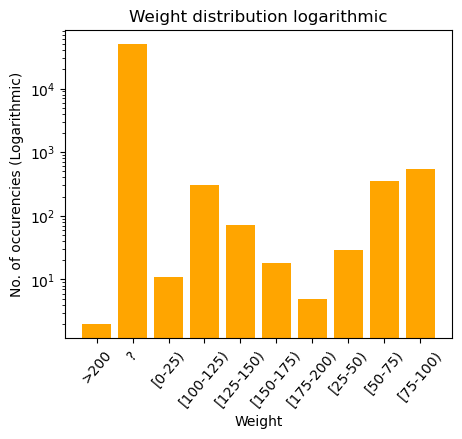

In [100]:
#Counting age occurencies and sorting by index.
weight_counts=df['weight'].value_counts().sort_index()

#As string sorting makes the plot a mess, we sort by the numerical value of the first number. 
weight_index=sorted(weight_counts.index,key=lambda x: int(x.split('-')[0]) if x[0].isdigit() else 99999)
weight_value=[weight_counts[x] for x in weight_index]

#Making a log bar plot
plt.figure(figsize=(5,4))
plt.bar(weight_index,weight_value,color='orange')
plt.title('Weight distribution logarithmic')
plt.xlabel('Weight')
plt.ylabel('No. of occurencies (Logarithmic)')
plt.xticks(rotation=50)
plt.yscale('log')
plt.show()



### discharge_disposition_id


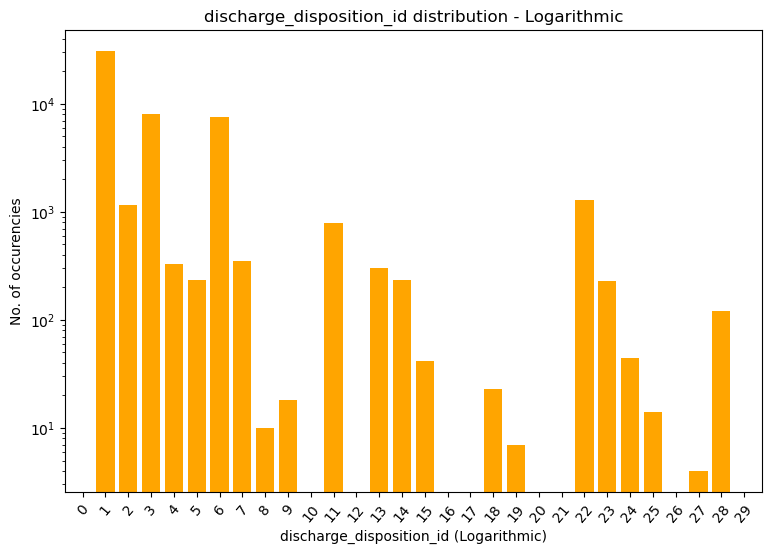

In [101]:
#Counting discharge disposition occurencies and sorting by index.
discharge_disposition_counts=df['discharge_disposition_id'].value_counts().sort_index()

#Creating lists of values and indicies. 
discharge_disposition_counts_index=discharge_disposition_counts.index
discharge_disposition_counts_value=discharge_disposition_counts.values


#Making a bar plot
plt.figure(figsize=(9,6))
plt.bar(discharge_disposition_counts_index,discharge_disposition_counts_value,color='orange')
plt.title('discharge_disposition_id distribution - Logarithmic')
plt.xlabel('discharge_disposition_id (Logarithmic)')
plt.ylabel('No. of occurencies')
plt.xticks(rotation=50)
x_locator = MultipleLocator(base=1)
plt.gca().xaxis.set_major_locator(x_locator)
plt.yscale('log')
plt.show()


### admission_source_id

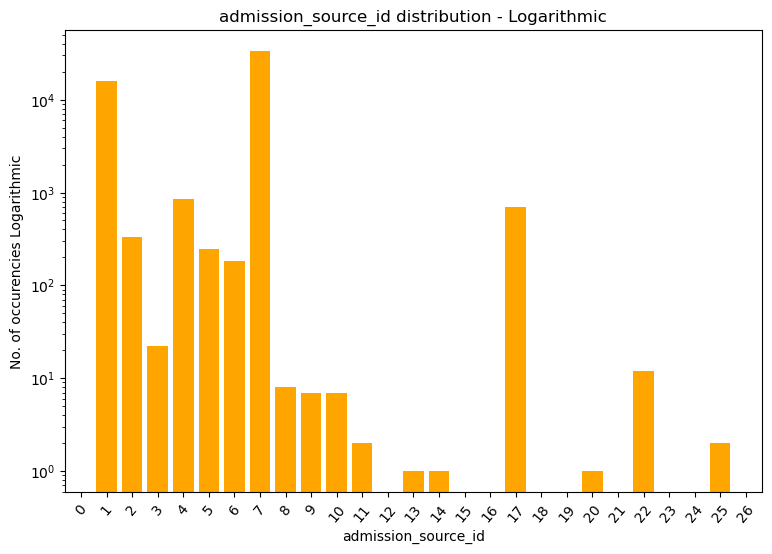

In [102]:
#Counting discharge disposition occurencies and sorting by index.
category_counts=df['admission_source_id'].value_counts().sort_index()

#Creating lists of values and indicies. 
index=category_counts.index
values=category_counts.values


#Making a bar plot
plt.figure(figsize=(9,6))
plt.bar(index,values,color='orange')
plt.title('admission_source_id distribution - Logarithmic')
plt.xlabel('admission_source_id')
plt.ylabel('No. of occurencies Logarithmic')
plt.xticks(rotation=50)
x_locator = MultipleLocator(base=1)
plt.gca().xaxis.set_major_locator(x_locator)
plt.yscale('log')
plt.show()

### length_of_stay


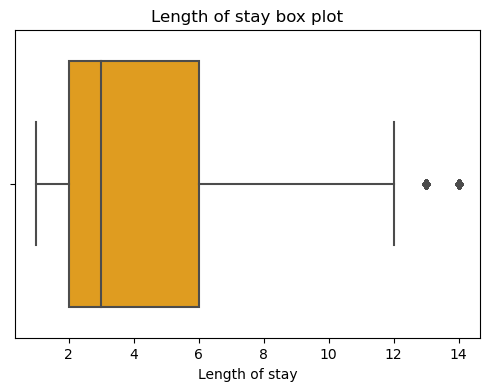

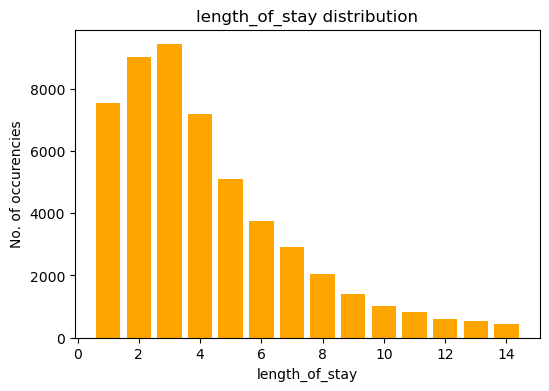

In [103]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df,x='length_of_stay',color='orange')
plt.title('Length of stay box plot')
plt.xlabel('Length of stay')
plt.show()

#Counting occurencies 
column='length_of_stay'
category_counts=df[column].value_counts()

#Creating lists of values and indicies. 
index=category_counts.index
values=category_counts.values

#Making a bar plot
plt.figure(figsize=(6,4))
plt.bar(index,values,color='orange')
plt.title(f'{column} distribution')
plt.xlabel(column)
plt.ylabel('No. of occurencies')
plt.xticks()
x_locator = MultipleLocator(base=2)
plt.gca().xaxis.set_major_locator(x_locator)
plt.show()

### payer_code   


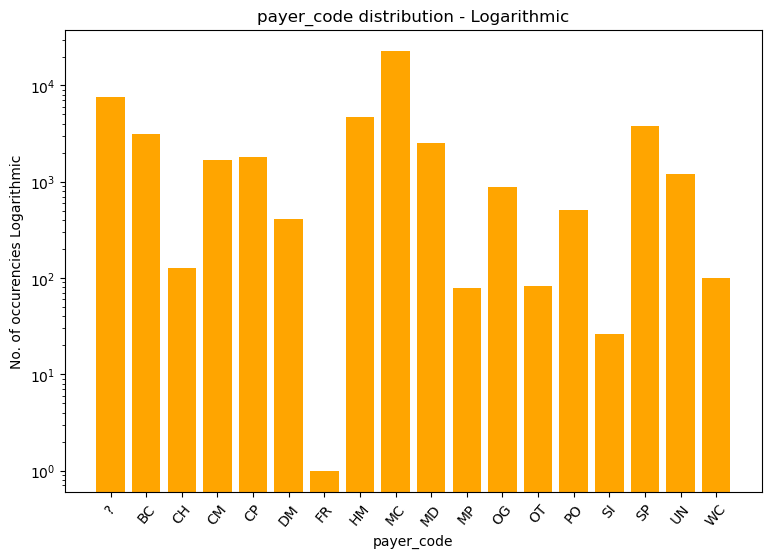

In [104]:
#Counting discharge disposition occurencies and sorting by index.
category_counts=df['payer_code'].value_counts().sort_index()

#Creating lists of values and indicies. 
index=category_counts.index
values=category_counts.values

#Making a bar plot
plt.figure(figsize=(9,6))
plt.bar(index,values,color='orange')
plt.title('payer_code distribution - Logarithmic')
plt.xlabel('payer_code')
plt.ylabel('No. of occurencies Logarithmic')
plt.xticks(rotation=50)
plt.yscale('log')
plt.show()

### medical_specialty


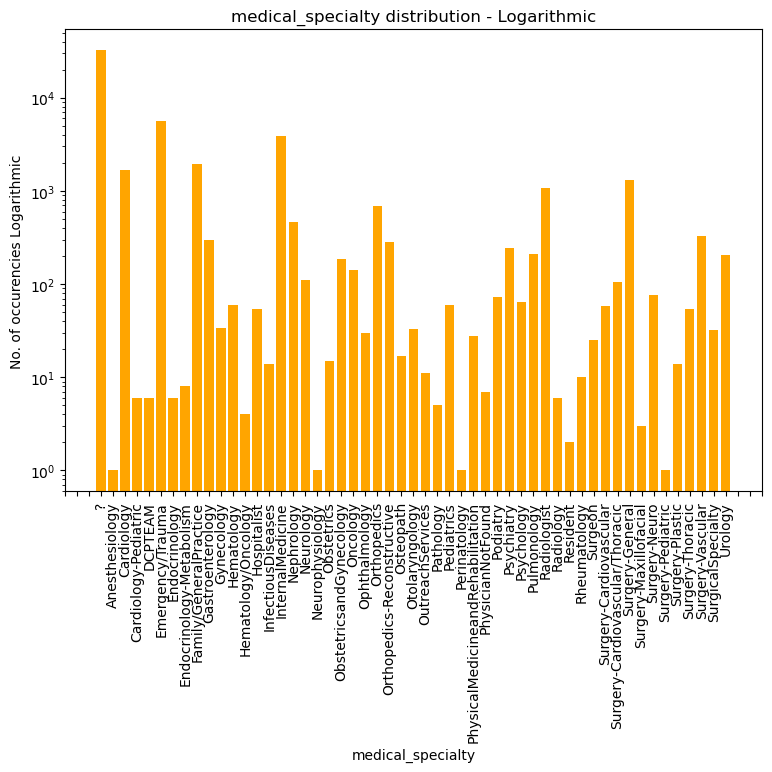

In [105]:
#Counting discharge disposition occurencies and sorting by index.
category_counts=df['medical_specialty'].value_counts().sort_index()

#Creating lists of values and indicies. 
index=category_counts.index
values=category_counts.values


#Making a bar plot
plt.figure(figsize=(9,6))
plt.bar(index,values,color='orange')
plt.title('medical_specialty distribution - Logarithmic')
plt.xlabel('medical_specialty')
plt.ylabel('No. of occurencies Logarithmic')
plt.xticks(rotation=90)
x_locator = MultipleLocator(base=1)
plt.gca().xaxis.set_major_locator(x_locator)
plt.yscale('log')
plt.show()

### num_lab_procedures


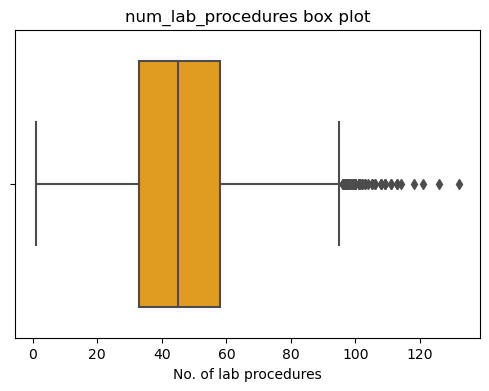

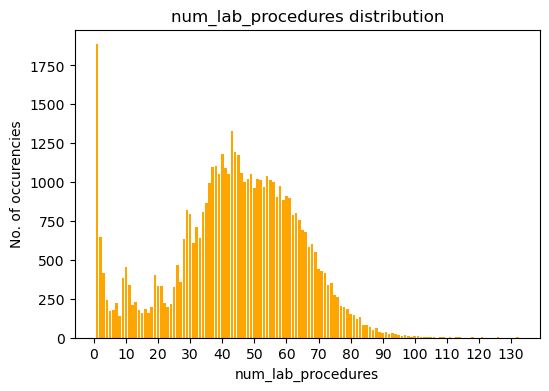

In [106]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df,x='num_lab_procedures',color='orange')
plt.title('num_lab_procedures box plot')
plt.xlabel('No. of lab procedures')
plt.show()

#Counting occurencies 
column='num_lab_procedures'
category_counts=df[column].value_counts()

#Creating lists of values and indicies. 
index=category_counts.index
values=category_counts.values

#Making a bar plot
plt.figure(figsize=(6,4))
plt.bar(index,values,color='orange')
plt.title(f'{column} distribution')
plt.xlabel(column)
plt.ylabel('No. of occurencies')
plt.xticks()
x_locator = MultipleLocator(base=10)
plt.gca().xaxis.set_major_locator(x_locator)
plt.show()

### num_procedures


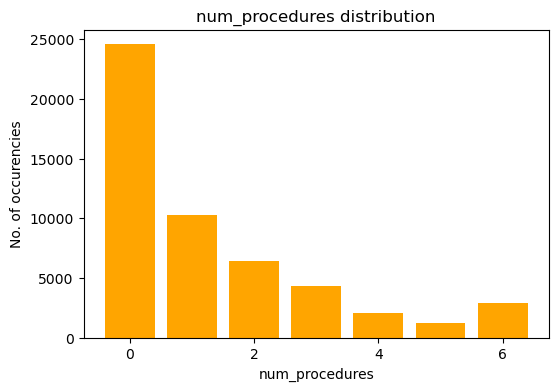

In [107]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df,x='num_procedures',color='orange')
plt.title('number of procedures - box plot')
plt.xlabel('No. of procedures ')
plt.show()

#Counting occurencies 
column='num_procedures'
category_counts=df[column].value_counts()

#Creating lists of values and indicies. 
index=category_counts.index
values=category_counts.values

#Making a bar plot
plt.figure(figsize=(6,4))
plt.bar(index,values,color='orange')
plt.title(f'{column} distribution')
plt.xlabel(column)
plt.ylabel('No. of occurencies')
plt.xticks()
x_locator = MultipleLocator(base=2)
plt.gca().xaxis.set_major_locator(x_locator)
plt.show()

### num_medications


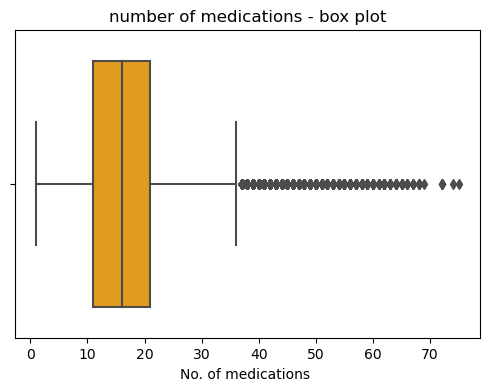

In [108]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df,x='num_medications',color='orange')
plt.title('number of medications - box plot')
plt.xlabel('No. of medications ')
plt.show()

#Counting occurencies 
column='num_medications'
category_counts=df[column].value_counts()

#Creating lists of values and indicies. 
index=category_counts.index
values=category_counts.values

#Making a bar plot
plt.figure(figsize=(6,4))
plt.bar(index,values,color='orange')
plt.title(f'{column} distribution')
plt.xlabel(column)
plt.ylabel('No. of occurencies')
plt.xticks()
x_locator = MultipleLocator(base=5)
plt.gca().xaxis.set_major_locator(x_locator)
plt.show()

### number_outpatient   


In [109]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df,x='number_outpatient',color='orange')
plt.title('number of outpatient visits in the year - box plot')
plt.xlabel('No. of outpatient visits ')
plt.show()


#Counting occurencies 
column='number_outpatient'
category_counts=df[column].value_counts()

#Creating lists of values and indicies. 
index=category_counts.index
values=category_counts.values

#Making a bar plot
plt.figure(figsize=(6,4))
plt.bar(index,values,color='orange')
plt.title(f'{column} distribution')
plt.xlabel(column)
plt.ylabel('No. of occurencies')
plt.xticks()
x_locator = MultipleLocator(base=3)
plt.gca().xaxis.set_major_locator(x_locator)
plt.show()


### number_emergency


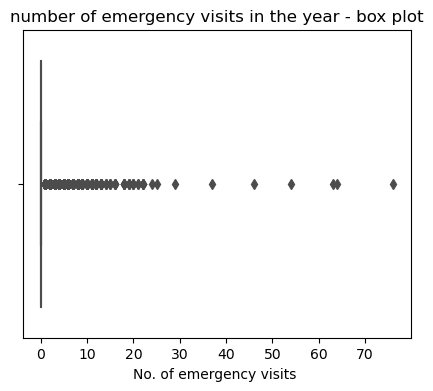

In [110]:
plt.figure(figsize=(5, 4))
sns.boxplot(data=df,x='number_emergency',color='orange')
plt.title('number of emergency visits in the year - box plot')
plt.xlabel('No. of emergency visits ')
plt.show()

#Counting occurencies 
column='number_emergency'
category_counts=df[column].value_counts()

#Creating lists of values and indicies. 
index=category_counts.index
values=category_counts.values

#Making a bar plot
plt.figure(figsize=(6,4))
plt.bar(index,values,color='orange')
plt.title(f'{column} distribution')
plt.xlabel(column)
plt.ylabel('No. of occurencies')
plt.xticks()
x_locator = MultipleLocator(base=10)
plt.gca().xaxis.set_major_locator(x_locator)
plt.show()

### number_inpatient


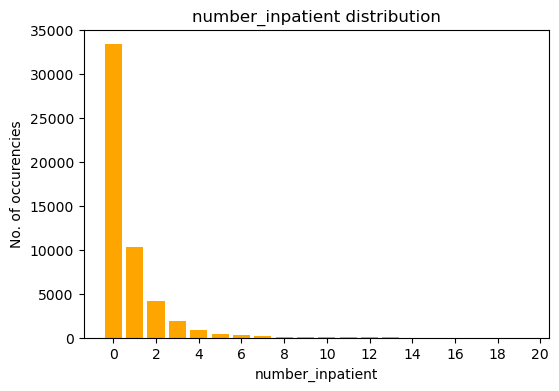

In [111]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df,x='number_inpatient',color='orange')
plt.title('number of inpatient visits in the year - box plot')
plt.xlabel('No. of inpatient visits ')
plt.show()

#Counting occurencies 
column='number_inpatient'
category_counts=df[column].value_counts()

#Creating lists of values and indicies. 
index=category_counts.index
values=category_counts.values

#Making a bar plot
plt.figure(figsize=(6,4))
plt.bar(index,values,color='orange')
plt.title(f'{column} distribution')
plt.xlabel(column)
plt.ylabel('No. of occurencies')
plt.xticks()
x_locator = MultipleLocator(base=2)
plt.gca().xaxis.set_major_locator(x_locator)
plt.show()

### diag_1


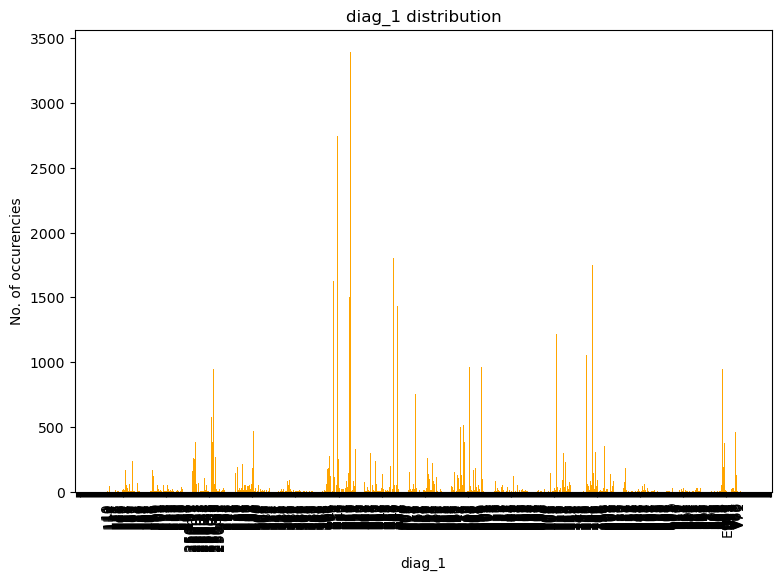

In [112]:
#Counting discharge disposition occurencies and sorting by index.
column='diag_1'
category_counts=df[column].value_counts().sort_index()

#Creating lists of values and indicies. 
index=category_counts.index
values=category_counts.values

#Making a bar plot
plt.figure(figsize=(9,6))
plt.bar(index,values,color='orange')
plt.title(f'{column} distribution')
plt.xlabel(column)
plt.ylabel('No. of occurencies')
plt.xticks(rotation=90)
x_locator = MultipleLocator(base=1)
plt.gca().xaxis.set_major_locator(x_locator)
plt.show()


In [113]:
#Counting occurencies and sorting by index.
column='diag_1'
category_counts=df[column].value_counts(ascending=False).head(40).sort_index()

#Creating lists of values and indicies. 
index=category_counts.index
values=category_counts.values

#Making a bar plot
plt.figure(figsize=(9,6))
plt.bar(index,values,color='orange')
plt.title(f'{column} distribution TOP 40')
plt.xlabel(column)
plt.ylabel('No. of occurencies')
plt.xticks(rotation=90)
x_locator = MultipleLocator(base=1)
plt.gca().xaxis.set_major_locator(x_locator)
plt.show()

### diag_2


In [114]:

#Counting discharge disposition occurencies and sorting by index.
column='diag_2'
category_counts=df[column].value_counts(ascending=False).head(40).sort_index()

#Creating lists of values and indicies. 
index=category_counts.index
values=category_counts.values

#Making a bar plot
plt.figure(figsize=(9,6))
plt.bar(index,values,color='orange')
plt.title(f'{column} distribution TOP 40')
plt.xlabel(column)
plt.ylabel('No. of occurencies')
plt.xticks(rotation=90)
x_locator = MultipleLocator(base=1)
plt.gca().xaxis.set_major_locator(x_locator)
plt.show()

### diag_3


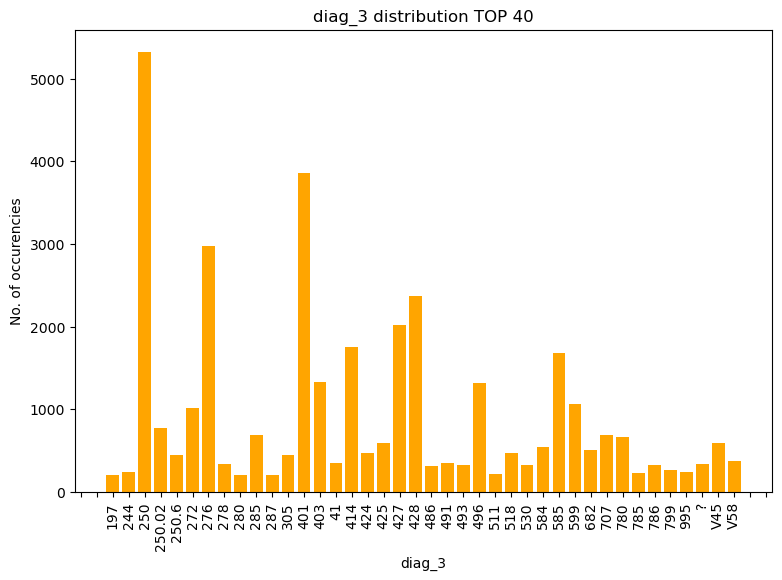

In [115]:
#Counting discharge disposition occurencies and sorting by index.
column='diag_3'
category_counts=df[column].value_counts(ascending=False).head(40).sort_index()

#Creating lists of values and indicies. 
index=category_counts.index
values=category_counts.values

#Making a bar plot
plt.figure(figsize=(9,6))
plt.bar(index,values,color='orange')
plt.title(f'{column} distribution TOP 40')
plt.xlabel(column)
plt.ylabel('No. of occurencies')
plt.xticks(rotation=90)
x_locator = MultipleLocator(base=1)
plt.gca().xaxis.set_major_locator(x_locator)
plt.show()

### number_diagnoses


count    51766.000000
mean         7.928486
std          1.693707
min          1.000000
25%          7.000000
50%          9.000000
75%          9.000000
max         16.000000
Name: number_diagnoses, dtype: float64


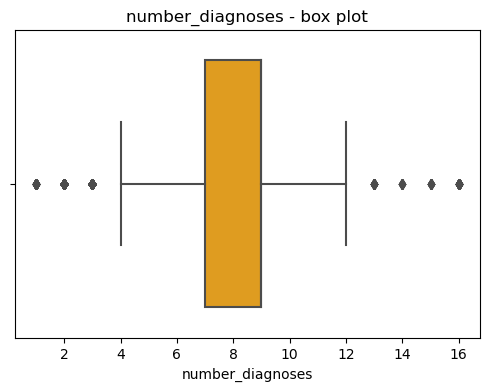

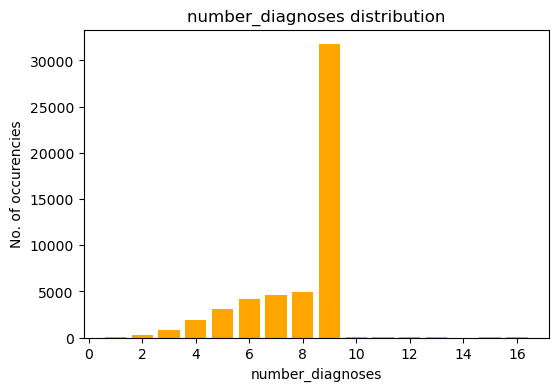

In [116]:
column='number_diagnoses'
print(df[column].describe())
plt.figure(figsize=(6, 4))
sns.boxplot(data=df,x=column,color='orange')
plt.title(f'{column} - box plot')
plt.xlabel(column)
plt.show()

#Counting occurencies 
column='number_diagnoses'
category_counts=df[column].value_counts()

#Creating lists of values and indicies. 
index=category_counts.index
values=category_counts.values

#Making a bar plot
plt.figure(figsize=(6,4))
plt.bar(index,values,color='orange')
plt.title(f'{column} distribution')
plt.xlabel(column)
plt.ylabel('No. of occurencies')
plt.xticks()
x_locator = MultipleLocator(base=2)
plt.gca().xaxis.set_major_locator(x_locator)
plt.show()

### max_glu_serum


In [117]:
#Counting discharge disposition occurencies and sorting by index.
column='max_glu_serum'
category_counts=df[column].value_counts().sort_index()

#Creating lists of values and indicies. 
index=category_counts.index
values=category_counts.values

#Making a bar plot
plt.figure(figsize=(9,6))
plt.bar(index,values,color='orange')
plt.title(f'{column} distribution')
plt.xlabel(column)
plt.ylabel('No. of occurencies')
plt.xticks(rotation=90)
x_locator = MultipleLocator(base=1)
plt.gca().xaxis.set_major_locator(x_locator)
plt.show()


### A1Cresult


In [118]:
#Counting discharge disposition occurencies and sorting by index.
column='A1Cresult'
category_counts=df[column].value_counts().sort_index()

#Creating lists of values and indicies. 
index=category_counts.index
values=category_counts.values

#Making a bar plot
plt.figure(figsize=(9,6))
plt.bar(index,values,color='orange')
plt.title(f'{column} distribution')
plt.xlabel(column)
plt.ylabel('No. of occurencies')
plt.xticks(rotation=90)
x_locator = MultipleLocator(base=1)
plt.gca().xaxis.set_major_locator(x_locator)
plt.show()


### metformin

In [119]:
#Counting discharge disposition occurencies and sorting by index.
column='metformin'
category_counts=df[column].value_counts().sort_index()

#Creating lists of values and indicies. 
index=category_counts.index
values=category_counts.values

#Making a bar plot
plt.figure(figsize=(9,6))
plt.bar(index,values,color='orange')
plt.title(f'{column} distribution')
plt.xlabel(column)
plt.ylabel('No. of occurencies')
plt.xticks(rotation=90)
x_locator = MultipleLocator(base=1)
plt.gca().xaxis.set_major_locator(x_locator)
plt.show()


### repaglinide

In [120]:
#Counting discharge disposition occurencies and sorting by index.
column='repaglinide'
category_counts=df[column].value_counts().sort_index()

#Creating lists of values and indicies. 
index=category_counts.index
values=category_counts.values

#Making a bar plot
plt.figure(figsize=(9,6))
plt.bar(index,values,color='orange')
plt.title(f'{column} distribution')
plt.xlabel(column)
plt.ylabel('No. of occurencies')
plt.xticks(rotation=90)
x_locator = MultipleLocator(base=1)
plt.gca().xaxis.set_major_locator(x_locator)
plt.show()


### nateglinide

In [121]:
#Counting discharge disposition occurencies and sorting by index.
column='nateglinide'
category_counts=df[column].value_counts().sort_index()

#Creating lists of values and indicies. 
index=category_counts.index
values=category_counts.values

#Making a bar plot
plt.figure(figsize=(9,6))
plt.bar(index,values,color='orange')
plt.title(f'{column} distribution')
plt.xlabel(column)
plt.ylabel('No. of occurencies')
plt.xticks(rotation=90)
x_locator = MultipleLocator(base=1)
plt.gca().xaxis.set_major_locator(x_locator)
plt.show()


### chlorpropamide

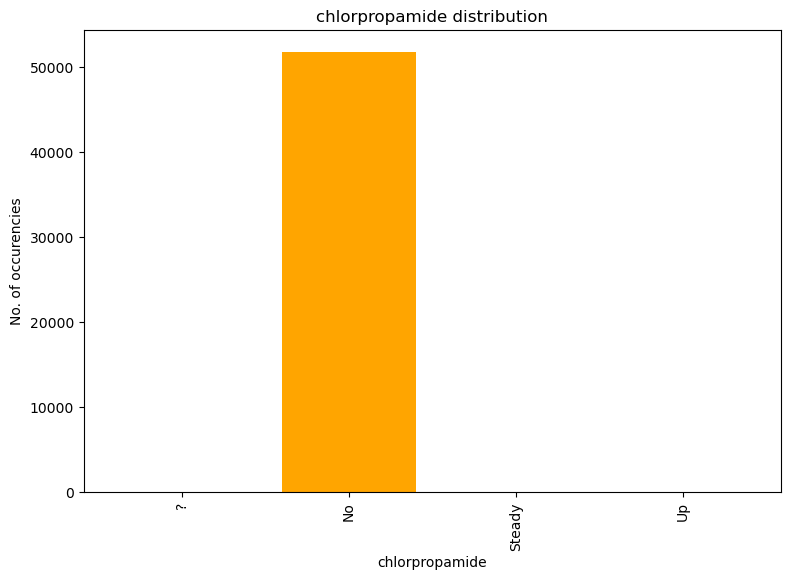

In [122]:
#Counting discharge disposition occurencies and sorting by index.
column='chlorpropamide'
category_counts=df[column].value_counts().sort_index()

#Creating lists of values and indicies. 
index=category_counts.index
values=category_counts.values

#Making a bar plot
plt.figure(figsize=(9,6))
plt.bar(index,values,color='orange')
plt.title(f'{column} distribution')
plt.xlabel(column)
plt.ylabel('No. of occurencies')
plt.xticks(rotation=90)
x_locator = MultipleLocator(base=1)
plt.gca().xaxis.set_major_locator(x_locator)
plt.show()


### glimepiride

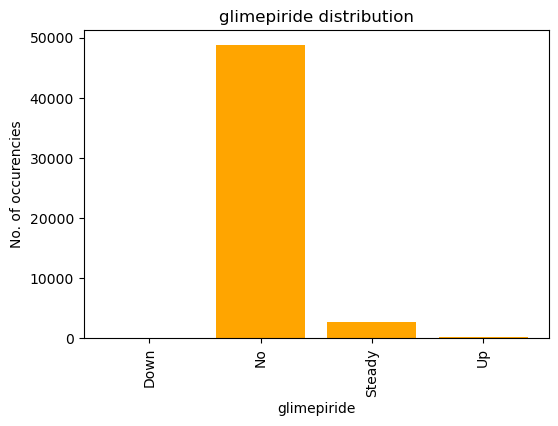

In [123]:
#Counting discharge disposition occurencies and sorting by index.
column='glimepiride'
category_counts=df[column].value_counts().sort_index()

#Creating lists of values and indicies. 
index=category_counts.index
values=category_counts.values

#Making a bar plot
plt.figure(figsize=(6,4))
plt.bar(index,values,color='orange')
plt.title(f'{column} distribution')
plt.xlabel(column)
plt.ylabel('No. of occurencies')
plt.xticks(rotation=90)
x_locator = MultipleLocator(base=1)
plt.gca().xaxis.set_major_locator(x_locator)
plt.show()


### acetohexamide

In [124]:
#Counting discharge disposition occurencies and sorting by index.
column='acetohexamide'
category_counts=df[column].value_counts().sort_index()

#Creating lists of values and indicies. 
index=category_counts.index
values=category_counts.values

#Making a bar plot
plt.figure(figsize=(4,4))
plt.bar(index,values,color='orange')
plt.title(f'{column} distribution')
plt.xlabel(column)
plt.ylabel('No. of occurencies')
plt.xticks(rotation=90)
x_locator = MultipleLocator(base=1)
plt.gca().xaxis.set_major_locator(x_locator)
plt.show()


### glipizide

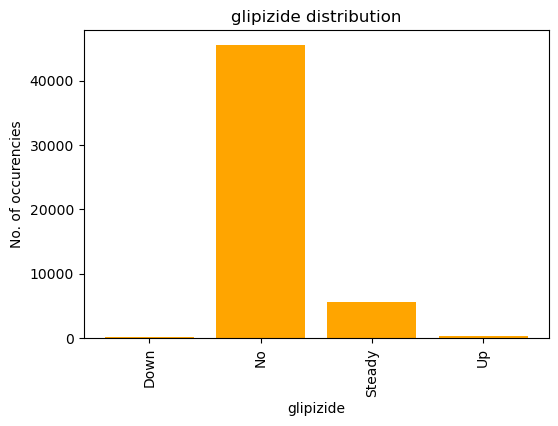

In [125]:
#Counting discharge disposition occurencies and sorting by index.
column='glipizide'
category_counts=df[column].value_counts().sort_index()

#Creating lists of values and indicies. 
index=category_counts.index
values=category_counts.values

#Making a bar plot
plt.figure(figsize=(6,4))
plt.bar(index,values,color='orange')
plt.title(f'{column} distribution')
plt.xlabel(column)
plt.ylabel('No. of occurencies')
plt.xticks(rotation=90)
x_locator = MultipleLocator(base=1)
plt.gca().xaxis.set_major_locator(x_locator)
plt.show()


### glyburide

In [126]:
#Counting discharge disposition occurencies and sorting by index.
column='glyburide'
category_counts=df[column].value_counts().sort_index()

#Creating lists of values and indicies. 
index=category_counts.index
values=category_counts.values

#Making a bar plot
plt.figure(figsize=(6,4))
plt.bar(index,values,color='orange')
plt.title(f'{column} distribution')
plt.xlabel(column)
plt.ylabel('No. of occurencies')
plt.xticks(rotation=90)
x_locator = MultipleLocator(base=1)
plt.gca().xaxis.set_major_locator(x_locator)
plt.show()


### tolbutamide


In [127]:
#Counting discharge disposition occurencies and sorting by index.
column='tolbutamide'
category_counts=df[column].value_counts().sort_index()

#Creating lists of values and indicies. 
index=category_counts.index
values=category_counts.values

#Making a bar plot
plt.figure(figsize=(4,4))
plt.bar(index,values,color='orange')
plt.title(f'{column} distribution')
plt.xlabel(column)
plt.ylabel('No. of occurencies')
plt.xticks(rotation=90)
x_locator = MultipleLocator(base=1)
plt.gca().xaxis.set_major_locator(x_locator)
plt.show()


### insulin

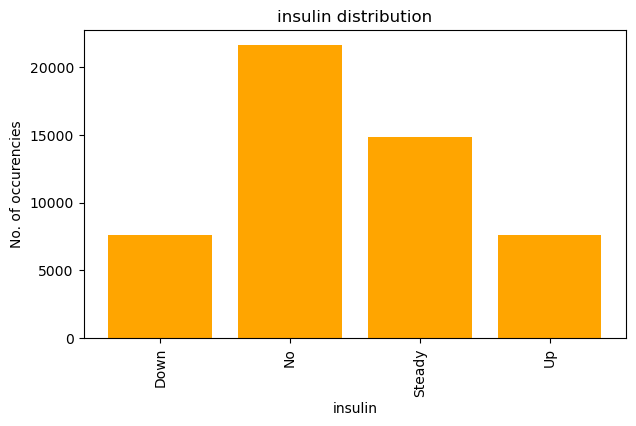

In [128]:
#Counting discharge disposition occurencies and sorting by index.
column='insulin'
category_counts=df[column].value_counts().sort_index()

#Creating lists of values and indicies. 
index=category_counts.index
values=category_counts.values

#Making a bar plot
plt.figure(figsize=(7,4))
plt.bar(index,values,color='orange')
plt.title(f'{column} distribution')
plt.xlabel(column)
plt.ylabel('No. of occurencies')
plt.xticks(rotation=90)
x_locator = MultipleLocator(base=1)
plt.gca().xaxis.set_major_locator(x_locator)
plt.show()


### change

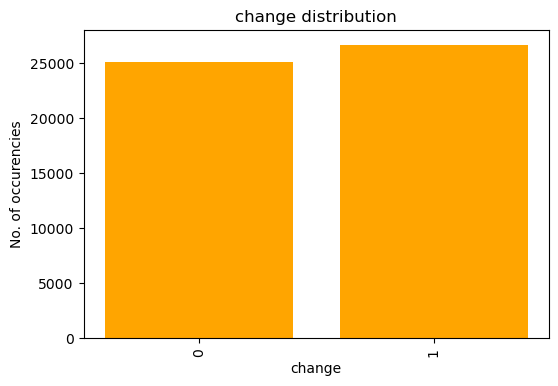

In [129]:
#Counting discharge disposition occurencies and sorting by index.
column='change'
category_counts=df[column].value_counts().sort_index()

#Creating lists of values and indicies. 
index=category_counts.index
values=category_counts.values

#Making a bar plot
plt.figure(figsize=(6,4))
plt.bar(index,values,color='orange')
plt.title(f'{column} distribution')
plt.xlabel(column)
plt.ylabel('No. of occurencies')
plt.xticks(rotation=90)
x_locator = MultipleLocator(base=1)
plt.gca().xaxis.set_major_locator(x_locator)
plt.show()


### diabetesMed

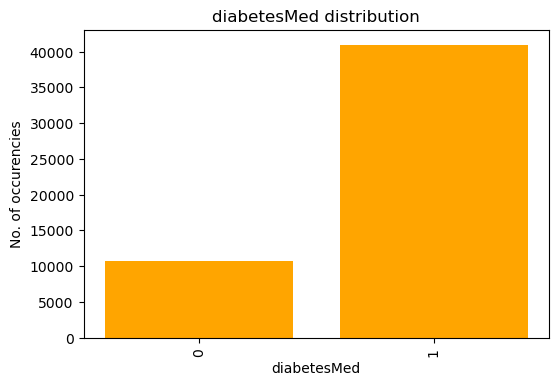

In [130]:
#Counting discharge disposition occurencies and sorting by index.
column='diabetesMed'
category_counts=df[column].value_counts().sort_index()

#Creating lists of values and indicies. 
index=category_counts.index
values=category_counts.values

#Making a bar plot
plt.figure(figsize=(6,4))
plt.bar(index,values,color='orange')
plt.title(f'{column} distribution')
plt.xlabel(column)
plt.ylabel('No. of occurencies')
plt.xticks(rotation=90)
x_locator = MultipleLocator(base=1)
plt.gca().xaxis.set_major_locator(x_locator)
plt.show()


### readmitted

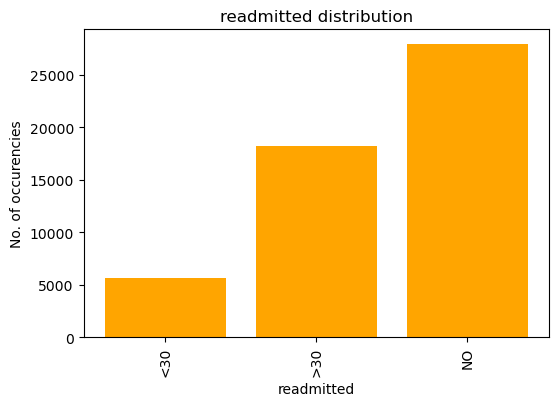

In [131]:
#Counting discharge disposition occurencies and sorting by index.
column='readmitted'
category_counts=df[column].value_counts().sort_index()

#Creating lists of values and indicies. 
index=category_counts.index
values=category_counts.values

#Making a bar plot
plt.figure(figsize=(6,4))
plt.bar(index,values,color='orange')
plt.title(f'{column} distribution')
plt.xlabel(column)
plt.ylabel('No. of occurencies')
plt.xticks(rotation=90)
x_locator = MultipleLocator(base=1)
plt.gca().xaxis.set_major_locator(x_locator)
plt.show()


### diabetes

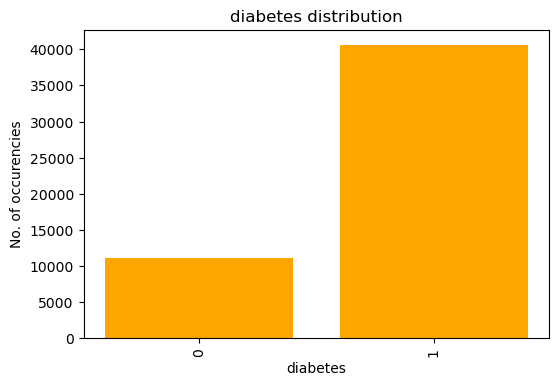

In [132]:
#Counting discharge disposition occurencies and sorting by index.
column='diabetes'
category_counts=df[column].value_counts().sort_index()

#Creating lists of values and indicies. 
index=category_counts.index
values=category_counts.values

#Making a bar plot
plt.figure(figsize=(6,4))
plt.bar(index,values,color='orange')
plt.title(f'{column} distribution')
plt.xlabel(column)
plt.ylabel('No. of occurencies')
plt.xticks(rotation=90)
x_locator = MultipleLocator(base=1)
plt.gca().xaxis.set_major_locator(x_locator)
plt.show()


## Task 3.2 - Relation between age and readmission
We may group by, to inspect any relation and find the relative frequency.


In [133]:
#From the code of tutorial we may group by to examine frequency:
print("Count of age and readmitted")
print(df.groupby(['age'])['readmitted'].value_counts())
print("------------------")
# We may normalize to get a understanding of the relative frequency
print("Normalised count (percentage) of age and readmitted")
print(df.groupby(['age'])['readmitted'].value_counts(normalize=True))

Count of age and readmitted
age       readmitted
[0-10)    NO              17
          >30              6
          <30              0
[10-20)   NO             132
          >30             76
          <30             15
[20-30)   NO             464
          >30            230
          <30            121
[30-40)   NO            1008
          >30            522
          <30            187
[40-50)   NO            2614
          >30           1539
          <30            471
[50-60)   NO            4792
          >30           2905
          <30            788
[60-70)   NO            6271
          >30           4075
          <30           1274
[70-80)   NO            6770
          >30           4767
          <30           1435
[80-90)   NO            4930
          >30           3611
          <30           1130
[90-100)  NO             940
          >30            483
          <30            193
Name: readmitted, dtype: int64
------------------
Normalised count (percentage) o

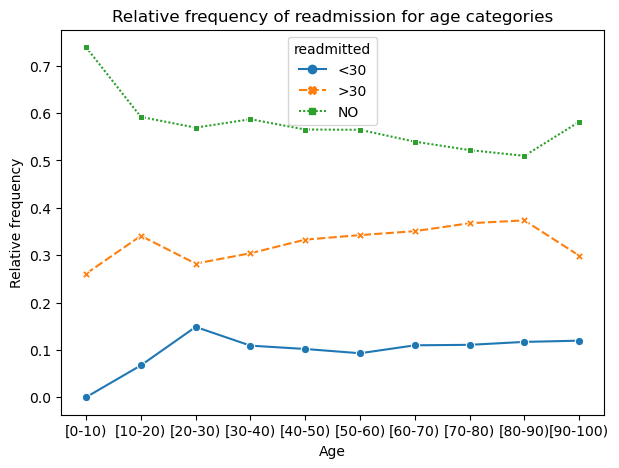

In [134]:
#Counting instances of each combination
T32_count=df.groupby(['age','readmitted']).size().reset_index(name='count')

#Converting it into a pivot table :
T32_pivot=T32_count.pivot(index='age',columns='readmitted',values='count')

#Nomalizing to get relative frequency (dividing by sum of all columns in a row). 
T32_pivot_norm = T32_pivot.div(T32_pivot.sum(axis=1), axis=0)

#Plotting:
plt.figure(figsize=(7, 5))
#Markes is the dot of each messurement
sns.lineplot(data=T32_pivot_norm, markers=True)
plt.xlabel('Age')
plt.ylabel('Relative frequency')
plt.legend(title='readmitted')
plt.title('Relative frequency of readmission for age categories')
plt.show()

<Axes: xlabel='readmitted', ylabel='age'>

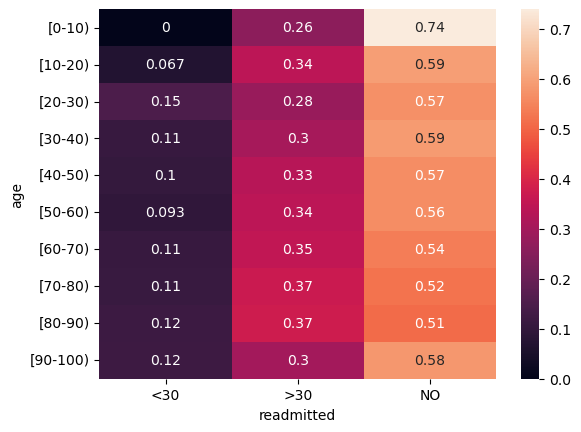

In [135]:
crossTab=pd.crosstab(df['age'],df['readmitted'],normalize='index')
sns.heatmap(crossTab,annot=True)

## Task 3.3
correlation.

We didn't use sns, because we had issues getting the values displayed in the heatmap. 

As acetohexamine and tolbutamide are constand and have no deviation, it has no correlation and pandas won't even be able to calculate it as it will divide by 0. So we may exclude these two columns. 
We convert all '?' to NaN, because Corr only recognize NaN. 

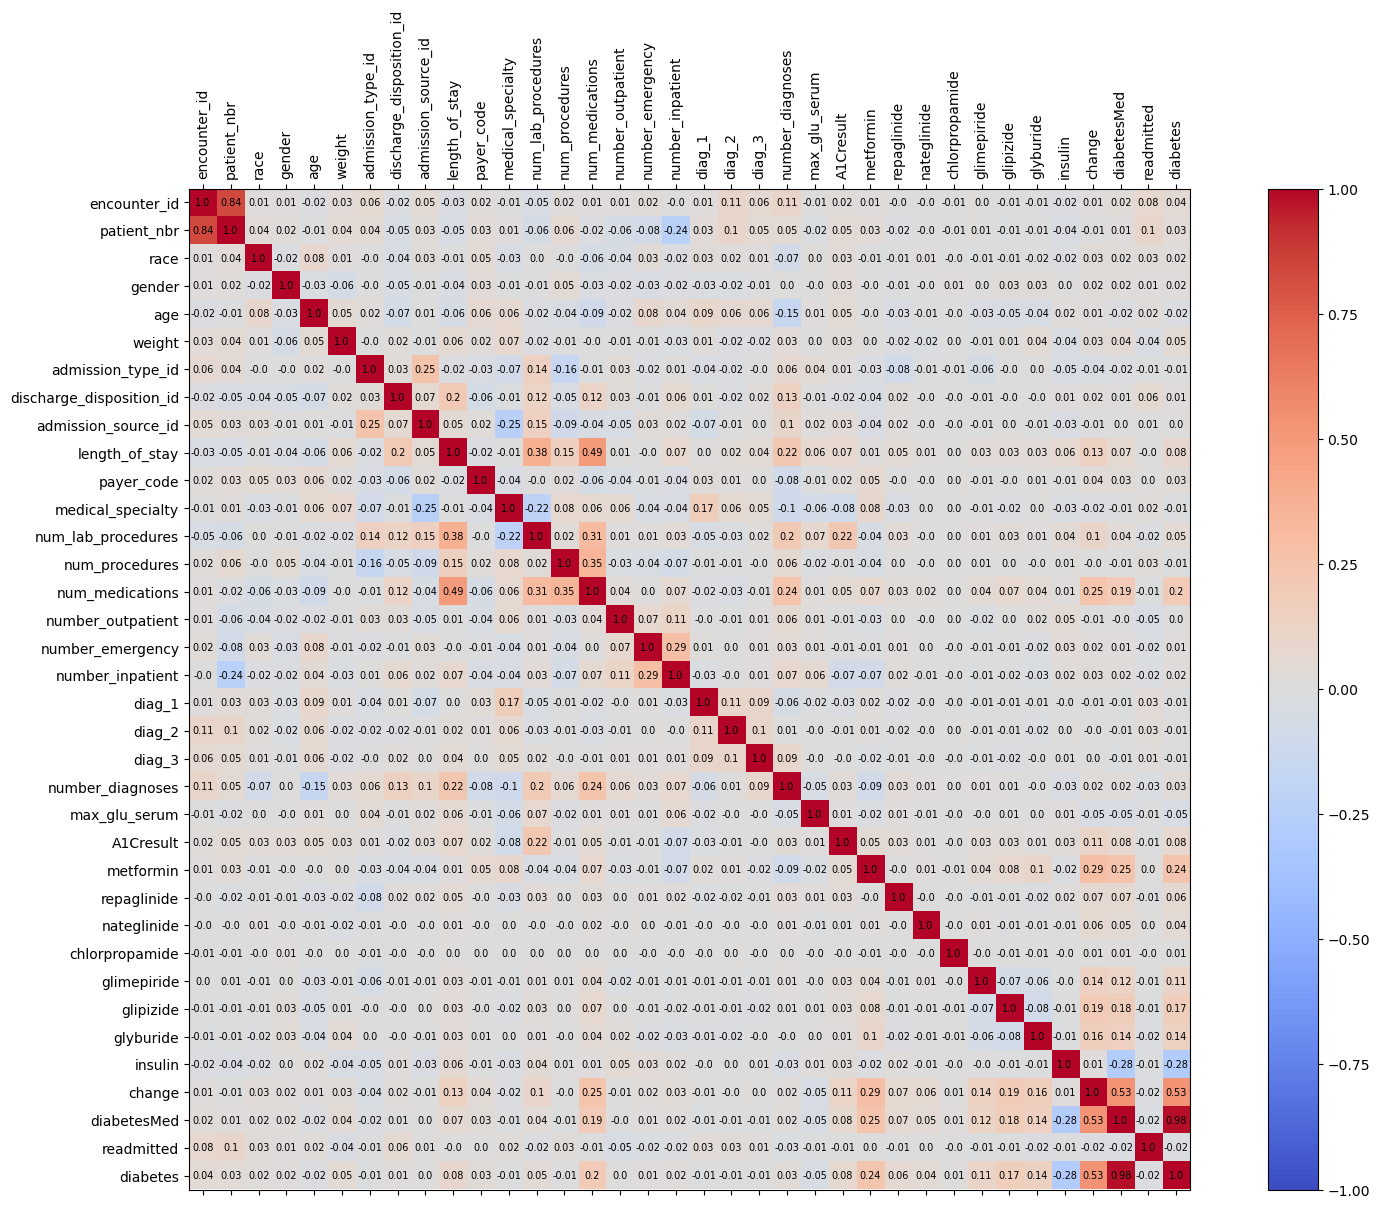

In [136]:
#Copying the dataframe
T33df = df.copy()

#Dropping unary variables as they don't correlate and pandas calculate corr to NaN.
T33df=T33df.drop(columns=['acetohexamide','tolbutamide'])

#Replace '?' or unknown id's with pd.NA, so it's factorized to -1
T33df=T33df.replace('?',np.nan)
T33df['admission_type_id']=T33df['admission_type_id'].replace([5,6,8],np.nan)
T33df['discharge_disposition_id']=T33df['discharge_disposition_id'].replace([18,25,26],np.nan)
T33df['admission_source_id']=T33df['admission_source_id'].replace([9,15,17,20,21],np.nan)
#The following three would be required if we had not replaced "none" with '?' in task 1.
T33df['gender']=T33df['gender'].replace('unknown/invalid',np.nan)

#Factorize categorical columns
for col in T33df.select_dtypes(include=['category']).columns:
    T33df[col] = pd.factorize(T33df[col])[0]
    
#Replace -1 with NaN, so corr ignores it. 
T33df=T33df.replace(-1,np.nan)

#Calculating correlation:
corr = T33df.corr(method='pearson')

#Some relations only have constant values, so pandas calculate it to NaN. It's the same as 0.
corr=corr.replace(np.nan,0) 

#Setting plot size:
fig=plt.figure(figsize=(20, 13))
ax=fig.add_subplot(111)

#Layout:
layout=ax.matshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(layout)

#Adding ticks
ticks=np.arange(0, len(T33df.columns), 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
plt.xticks(rotation=90)
ax.set_xticklabels(T33df.columns)
ax.set_yticklabels(T33df.columns)

#Inserting correlation values (Source: https://stackoverflow.com/questions/20998083/show-the-values-in-the-grid-using-matplotlib)
for (i, j), z in np.ndenumerate(corr):
    ax.text(j, i, f'{round(z,2)}',va='center',ha='center',fontsize=7)

plt.show()


In [138]:
print(corr)

                          encounter_id  patient_nbr      race    gender  \
encounter_id                  1.000000     0.835506  0.011450  0.012806   
patient_nbr                   0.835506     1.000000  0.036308  0.020424   
race                          0.011450     0.036308  1.000000 -0.022247   
gender                        0.012806     0.020424 -0.022247  1.000000   
age                          -0.018186    -0.009649  0.081245 -0.030366   
weight                        0.034121     0.043843  0.011783 -0.055891   
admission_type_id             0.060859     0.040624 -0.000911 -0.000491   
discharge_disposition_id     -0.022084    -0.047547 -0.043356 -0.046948   
admission_source_id           0.051623     0.028469  0.030144 -0.007046   
length_of_stay               -0.033914    -0.047772 -0.008095 -0.036677   
payer_code                    0.018471     0.033143  0.051917  0.032109   
medical_specialty            -0.007349     0.011105 -0.032195 -0.012974   
num_lab_procedures       

# Task 4 - Data preperation


We go through all the data cleaning steps. 


## Correcting inconsistencies
We start of by correcting the multiple null classes of the following columns to np.nan. 

In [139]:
df['admission_type_id']=df['admission_type_id'].replace([5,6,8],np.nan)
df['discharge_disposition_id']=df['discharge_disposition_id'].replace([18,25,26],np.nan)
df['admission_source_id']=df['admission_source_id'].replace([9,15,17,20,21],np.nan)

### diag_1, diag_2, diag_3 

We clean the diagnoses for subdiagnoses - We shorten it to a length of 3.
If we have values under 3 in length, we assume the operator forgot to put zeros in front. 

In [140]:
def cleanDiag(value):
    #Take the 3 first characters of the string if it's longer than 3.
    if len(value) > 3:
        return value[:3]
    #If '?' return '?'
    if value == '?':
        return value
    #If shorter than 3, fill zeros until reached length
    if len(value) < 3:
        return value.zfill(3)
    else:
        return value

#Apply do columns. 
df['diag_1'] = df['diag_1'].apply(cleanDiag)
df['diag_2'] = df['diag_2'].apply(cleanDiag)
df['diag_3'] = df['diag_2'].apply(cleanDiag)

Now, we have a better overview of the distribution and can see that diag 250 (diabetes) is dominating.   
We do lose some details by reducing it to 3 digit diagnosis, but we want to stick to the specification. 

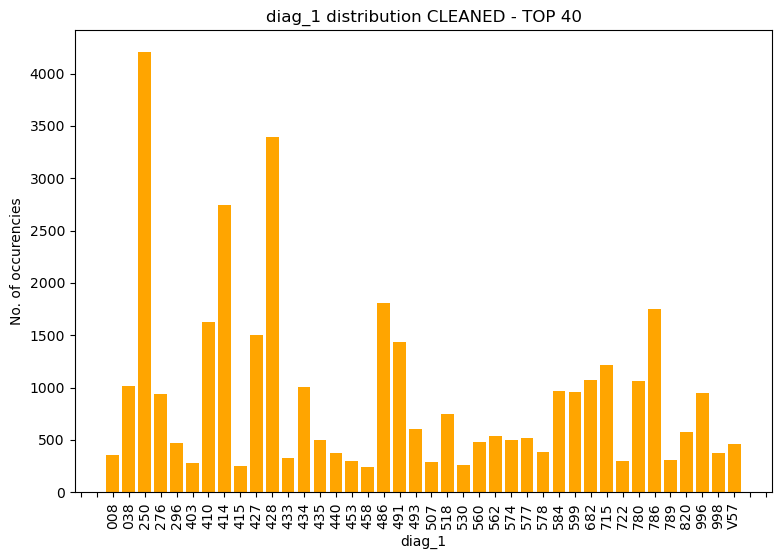

In [141]:
#Counting occurencies and sorting by index.
column='diag_1'
category_counts=df[column].value_counts(ascending=False).head(40).sort_index()

#Creating lists of values and indicies. 
index=category_counts.index
values=category_counts.values

#Making a bar plot
plt.figure(figsize=(9,6))
plt.bar(index,values,color='orange')
plt.title(f'{column} distribution CLEANED - TOP 40')
plt.xlabel(column)
plt.ylabel('No. of occurencies')
plt.xticks(rotation=90)
x_locator = MultipleLocator(base=1)
plt.gca().xaxis.set_major_locator(x_locator)
plt.show()

#### Inconsistencies for each patient number
We correct the inconsistent values with the mode for each patient number.   
We start with the gender, where we analyze the conversion of the 3 possible scenarios.

### Gender

In [142]:
print(df[df['patient_nbr'] == 31693671][['patient_nbr', 'gender']])
print(df[df['patient_nbr'] == 40867677][['patient_nbr', 'gender']])
print(df[df['patient_nbr'] == 109210482][['patient_nbr', 'gender']])

      patient_nbr  gender
11356    31693671  Female
24156    31693671  Female
32094    31693671  Female
51764    31693671       ?
      patient_nbr  gender
24244    40867677    Male
26845    40867677  Female
39981    40867677    Male
      patient_nbr  gender
15862   109210482  Female
16706   109210482    Male


In [143]:
#We determine all rows without '?', as we don't want the '?' as mode. 
nonUndefinedRows= df[df['gender'] != '?']

#Individual mode calculation. If there is no mode, we leave it undefined '?'. However, I could not get it to insert '?'. 
#It will take the first registered value as mode, if the distribution is even.
patientModeMap = nonUndefinedRows.groupby('patient_nbr')['gender'].apply( lambda x: x.mode().iloc[0] if not x.empty else '?')

#Map the patient number with the mode. If it's not a part of the map, it would just use the original mode. 
df['gender'] = df['patient_nbr'].map(patientModeMap).fillna(df['gender'])

In [144]:
print(df[df['patient_nbr'] == 31693671][['patient_nbr', 'gender']])
print(df[df['patient_nbr'] == 40867677][['patient_nbr', 'gender']])
print(df[df['patient_nbr'] == 109210482][['patient_nbr', 'gender']])

      patient_nbr  gender
11356    31693671  Female
24156    31693671  Female
32094    31693671  Female
51764    31693671  Female
      patient_nbr gender
24244    40867677   Male
26845    40867677   Male
39981    40867677   Male
      patient_nbr  gender
15862   109210482  Female
16706   109210482  Female


### Race

In [145]:
print(df[df['patient_nbr'] == 151228229][['patient_nbr', 'race']])

      patient_nbr   race
40881   151228229  Other
42212   151228229  Asian
49426   151228229  Asian


In [146]:
#We determine all rows without '?', as we don't want the '?' as mode. 
nonUndefinedRows= df[df['race'] != '?']

#Individual mode calculation. If there is no mode, we leave it undefined '?'. However, I could not get it to insert '?'. 
#It will take the first registered value as mode, if the distribution is even.
patientModeMap = nonUndefinedRows.groupby('patient_nbr')['race'].apply( lambda x: x.mode().iloc[0] if not x.empty else '?')

#Map the patient number with the mode. If it's not a part of the map, it would just use the original mode. 
df['race'] = df['patient_nbr'].map(patientModeMap).fillna(df['race'])

In [147]:
print(df[df['patient_nbr'] == 151228229][['patient_nbr', 'race']])

      patient_nbr   race
40881   151228229  Asian
42212   151228229  Asian
49426   151228229  Asian


### Derived variable
We must derive a variable for task 5, prior to label encoding. See task 5 for details. 

In [148]:
#Before conversion:
print("Before conversion:")
print(df['readmitted'].value_counts())

#Conversion:
readmitMap = {'<30':True,'>30':True,'NO':False}
df['readmitted_boolean']=df['readmitted'].map(readmitMap).astype(bool)

#After conversion:
print("\nAfter conversion:")
print(df['readmitted_boolean'].value_counts())

Before conversion:
NO     27938
>30    18214
<30     5614
Name: readmitted, dtype: int64

After conversion:
False    27938
True     23828
Name: readmitted_boolean, dtype: int64


### Deleting columns
We check for the percentage of missing values.

In [149]:
#Empty map to hold column and count of missing values. 
countAll = {}

#Makes it easier to count. Looking back, we should probably have put np.nan in all categories instead of '?'
df = df.replace('?', np.nan)

#This changes mixed data types to object. We change it back to category.
for column in df.columns:
    if df[column].dtype.name == 'object':
        df[column] = df[column].astype('category')

#Check each column
for column in df.columns:
    count=df[column].isnull().sum()
    countAll[column]=count

#Total number of rows
rowsTotal = len(df)

#Check percentage of missing values. If above 10, we print. 
print("Percentage of missing values for columns above 10%:")
for column, count in countAll.items():
    percentage = round((count/rowsTotal)*100,2)
    if percentage > 0:
        print(f'{column: <22}: {percentage}% ')


Percentage of missing values for columns above 10%:
race                  : 1.85% 
gender                : 0.01% 
weight                : 97.42% 
admission_type_id     : 5.31% 
discharge_disposition_id: 0.07% 
admission_source_id   : 1.38% 
payer_code            : 14.68% 
medical_specialty     : 62.21% 
num_procedures        : 0.06% 
num_medications       : 0.12% 
number_inpatient      : 0.04% 
diag_1                : 0.02% 
diag_2                : 0.18% 
diag_3                : 0.18% 
chlorpropamide        : 0.02% 


We delete all of the redundant, missing, unary or close to unary variables. 

In [150]:
df=df.drop(columns=['encounter_id','diabetes','medical_specialty','chlorpropamide','repaglinide','nateglinide','acetohexamide','tolbutamide','weight'])

### Missing values
We will fill in any missing values where appropiate. 

For all categories, we will fill with the mode.

In [151]:
for column in df.columns:
    if df[column].dtype.name=='category':
        modeValue=df[column].mode()[0]
        df[column]=df[column].fillna(modeValue)

For numeric values we fill with the mean. 
We round the mean to nearest integer to keep the data type.  
If we had a lower range and more missing values, it could lead to loss of precision and we should probably convert to float.  

In [152]:

meanValue=int(round(df['num_procedures'].mean(),0))
df['num_procedures']=df['num_procedures'].fillna(meanValue)

meanValue=int(round(df['num_medications'].mean(),0))
df['num_medications']=df['num_medications'].fillna(meanValue)

meanValue=int(round(df['number_inpatient'].mean(),0))
df['number_inpatient']=df['number_inpatient'].fillna(meanValue)

### Normalization
We use z-score normalization

In [153]:
scaler = StandardScaler()
for column in df.columns:
    if df[column].dtype in ['int64', 'Int64']:
        df[column] = scaler.fit_transform(df[[column]])

### Label encoding

We use label encoding to convert categories to a number. 

In [154]:
#We create an empty map to store all labels with index corrosponding to the encoded label. 
labelMap = {}
#Loop through all columns
for column in df.columns:
    #Only label encode categories
    if df[column].dtype.name=='category':
        #Encoding and getting labels.
        df[column],labels=df[column].factorize()
        #Storing labels in map
        labelMap[column] = labels
#Access the labels like this:
#labelMap[column][encodedLabel])

## Task 5

In [155]:
corrReadmitted = df.corr()['readmitted_boolean'].sort_values(ascending=False,key=lambda x: abs(x))
print(corrReadmitted)

readmitted_boolean          1.000000
readmitted                 -0.416176
number_inpatient            0.232748
patient_nbr                -0.198362
number_emergency            0.115071
number_outpatient           0.091695
number_diagnoses            0.088034
diabetesMed                 0.061750
num_medications             0.053669
diag_1                     -0.050546
num_lab_procedures          0.049446
race                       -0.049136
num_procedures             -0.048494
change                      0.048234
length_of_stay              0.046139
diag_2                     -0.041794
diag_3                     -0.041794
max_glu_serum               0.040199
age                        -0.034358
payer_code                 -0.032237
metformin                  -0.027151
glipizide                   0.024908
discharge_disposition_id   -0.022625
gender                     -0.022032
insulin                     0.021487
admission_type_id           0.016933
glyburide                   0.010243
A

<Axes: xlabel='readmitted_boolean', ylabel='readmitted'>

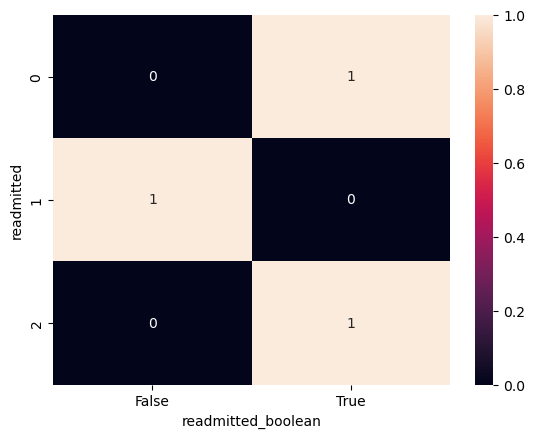

In [156]:
crossTab=pd.crosstab(df['readmitted'],df['readmitted_boolean'],normalize='index')
sns.heatmap(crossTab,annot=True)

### We save the df to csv file:

In [157]:
df.to_csv('D1-processed.csv')